In [1]:
!pip install pingouin
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import scipy.stats as stats
from itertools import product
import pingouin as pg
from itertools import combinations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=3d1fbdd0ec4ac6c4f34d5df3302418aa7032db77ba4fdb190d181af57a64a5c3
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [2]:
# Load data
housing_df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train.csv')
df_adjusted = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train_adjusted.csv')
# data description: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1460 non-null   int64  
 1   Unnamed: 0     1460 non-null   int64  
 2   Id             1460 non-null   int64  
 3   MSSubClass     1460 non-null   int64  
 4   MSZoning       1460 non-null   object 
 5   LotFrontage    1201 non-null   float64
 6   LotArea        1460 non-null   int64  
 7   Street         1460 non-null   object 
 8   Alley          91 non-null     object 
 9   LotShape       1460 non-null   object 
 10  LandContour    1460 non-null   object 
 11  Utilities      1460 non-null   object 
 12  LotConfig      1460 non-null   object 
 13  LandSlope      1460 non-null   object 
 14  Neighborhood   1460 non-null   object 
 15  Condition1     1460 non-null   object 
 16  Condition2     1460 non-null   object 
 17  BldgType       1460 non-null   object 
 18  HouseSty

In [3]:
df_adjusted


Unnamed: 0.1  Unnamed: 0    Id  MSSubClass MSZoning  LotFrontage  \
0                0           0     1          60       RL         65.0   
1                1           1     2          20       RL         80.0   
2                2           2     3          60       RL         68.0   
3                3           3     4          70       RL         60.0   
4                4           4     5          60       RL         84.0   
...            ...         ...   ...         ...      ...          ...   
1455          1455        1455  1456          60       RL         62.0   
1456          1456        1456  1457          20       RL         85.0   
1457          1457        1457  1458          70       RL         66.0   
1458          1458        1458  1459          20       RL         68.0   
1459          1459        1459  1460          20       RL         75.0   

      LotArea Street Alley LotShape  ... PoolQC  Fence MiscFeature MiscVal  \
0        8450   Pave   NaN      Reg  ...    NaN    NaN         NaN       0   
1        9600   Pave   NaN      Reg  ...    NaN    NaN         NaN       0   
2       11250   Pave   NaN      IR1  ...    NaN    NaN         NaN       0   
3        9550   Pave   NaN      IR1  ...    NaN    NaN         NaN       0   
4       14260   Pave   NaN      IR1  ...    NaN    NaN         NaN       0   
...       ...    ...   ...      ...  ...    ...    ...         ...     ...   
1455     7917   Pave   NaN      Reg  ...    NaN    NaN         NaN       0   
1456    13175   Pave   NaN      Reg  ...    NaN  MnPrv         NaN       0   
1457     9042   Pave   NaN      Reg  ...    NaN  GdPrv        Shed    2500   
1458     9717   Pave   NaN      Reg  ...    NaN    NaN         NaN       0   
1459     9937   Pave   NaN      Reg  ...    NaN    NaN         NaN       0   

     MoSold YrSold SaleType SaleCondition SalePrice   AdjSalePrice  
0         2   2008       WD        Normal    208500  398750.982473  
1         5   2007       WD        Normal    181500  401247.755503  
2         9   2008       WD        Normal    223500  368453.793465  
3         2   2006       WD       Abnorml    140000  307042.407728  
4        12   2008       WD        Normal    250000  459555.010815  
...     ...    ...      ...           ...       ...            ...  
1455      8   2007       WD        Normal    175000  307101.075328  
1456      2   2010       WD        Normal    210000  382687.537712  
1457      5   2010       WD        Normal    266500  399864.532624  
1458      4   2010       WD        Normal    142125  236296.050474  
1459      6   2008       WD        Normal    147500  358962.497548  

[1460 rows x 84 columns]

In [ ]:
df_adjusted['AdjSalePrice'].max()


1201601.3762694856

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1274: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


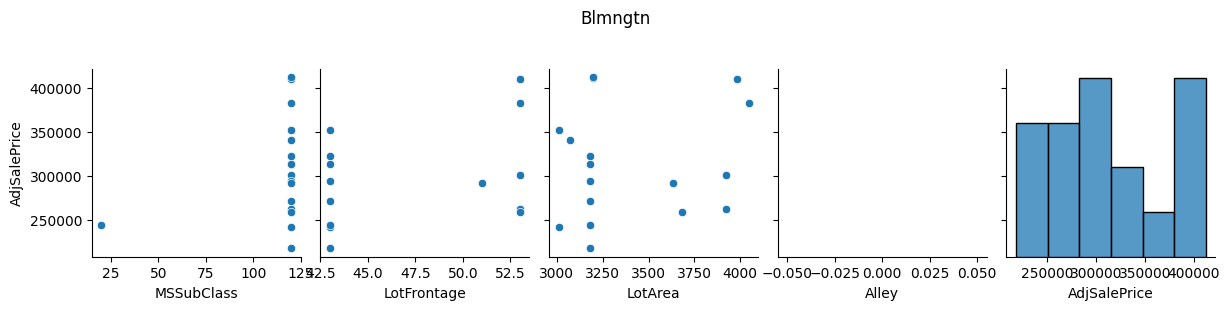

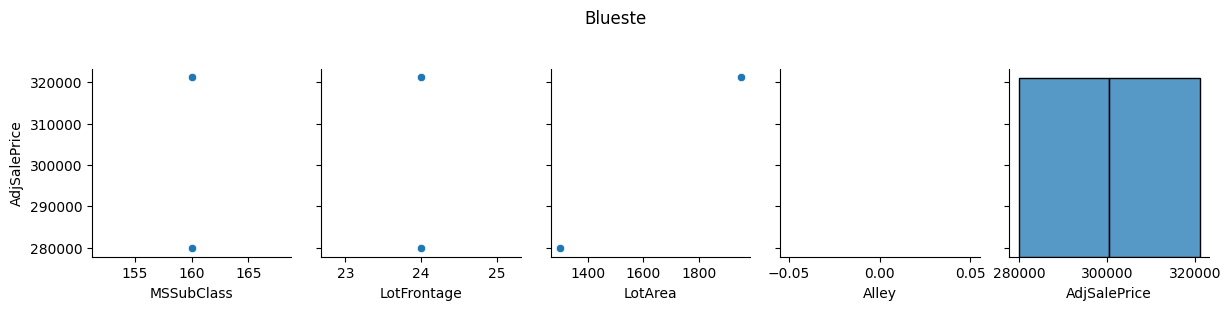

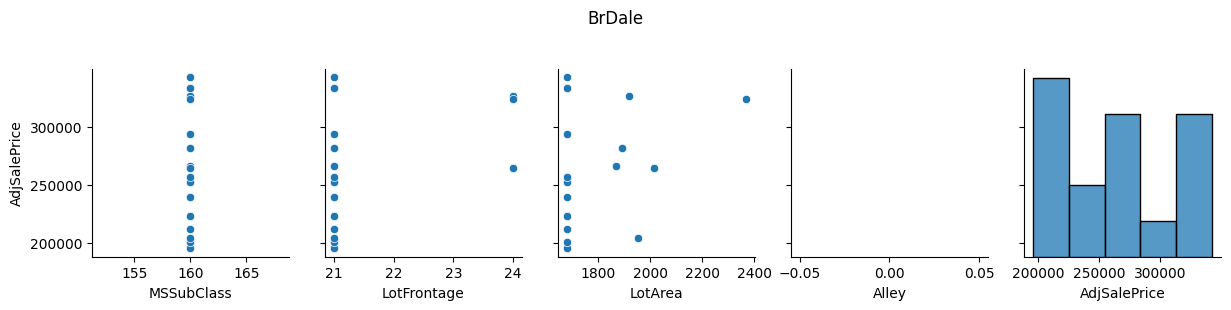

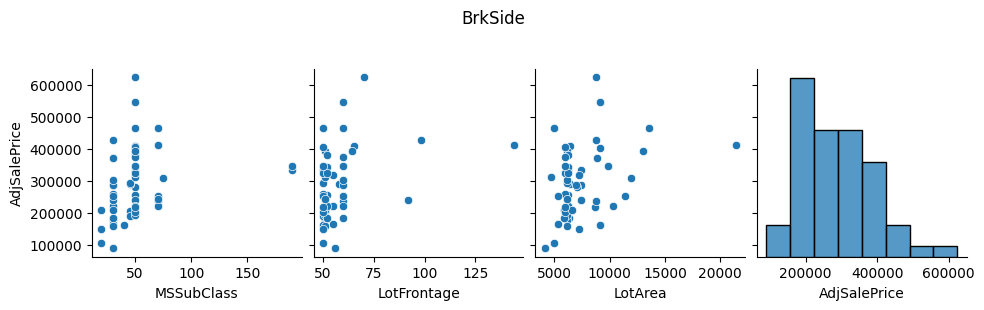

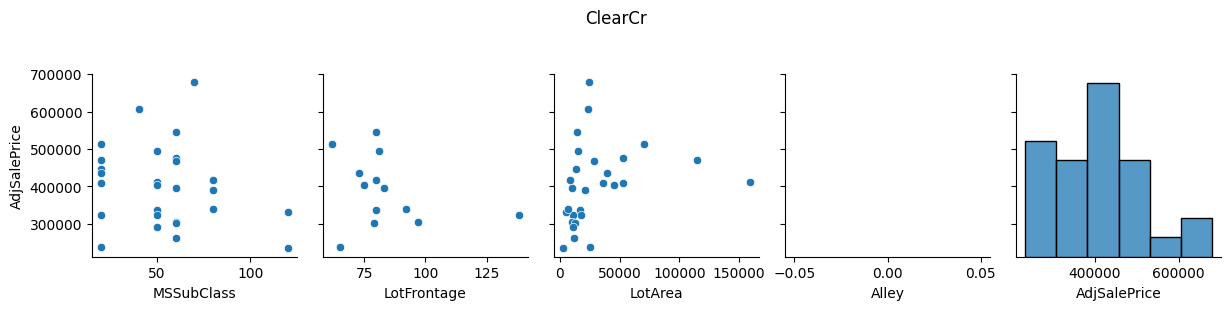

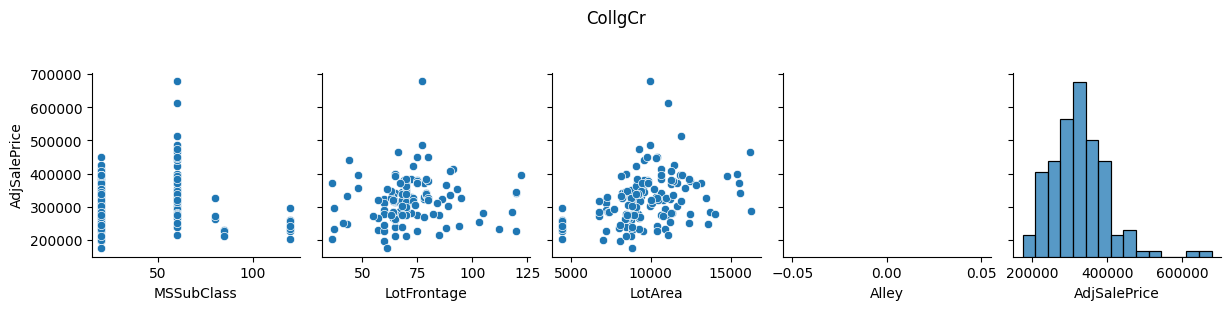

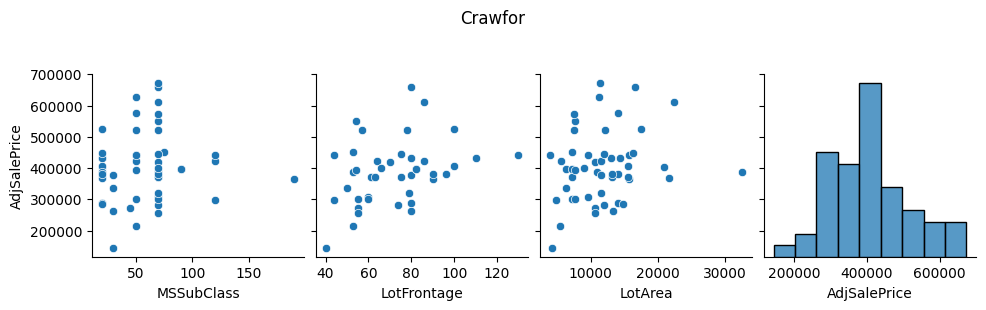

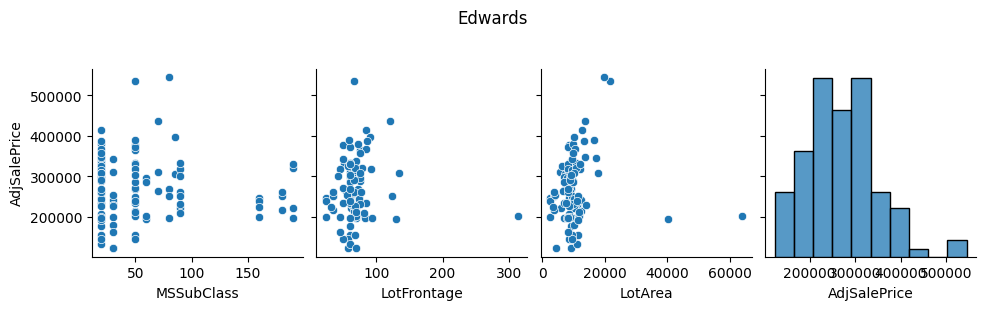

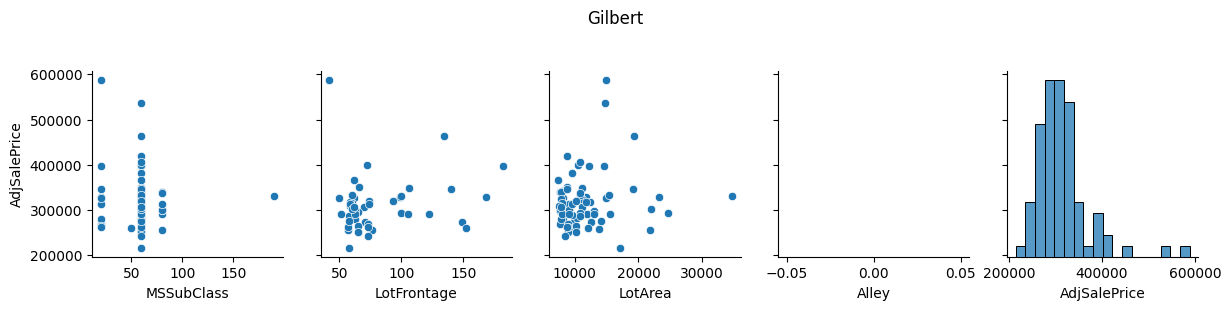

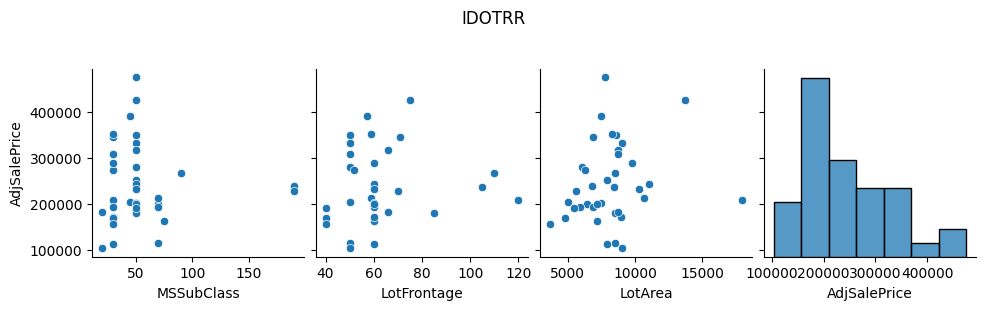

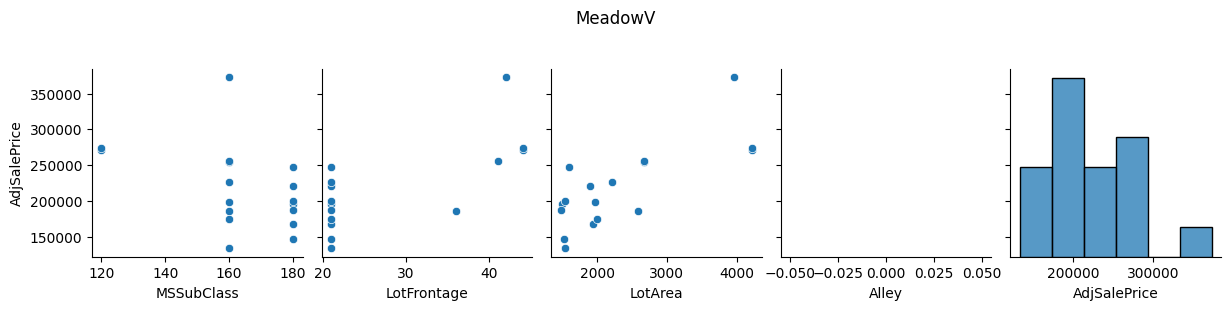

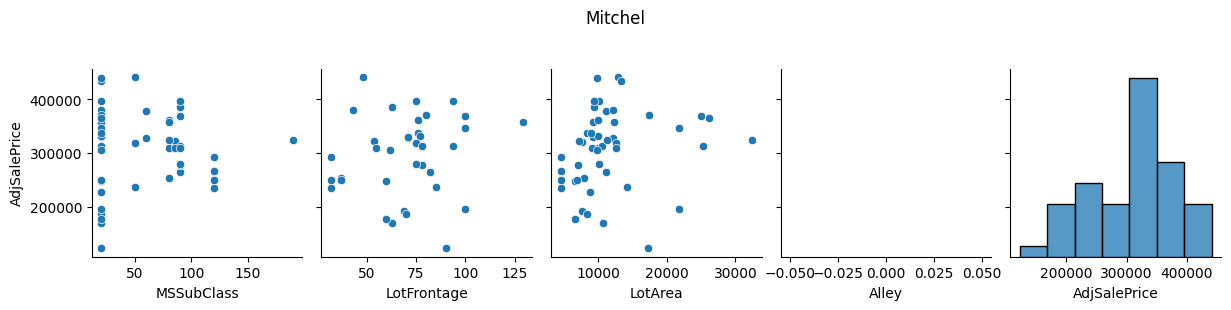

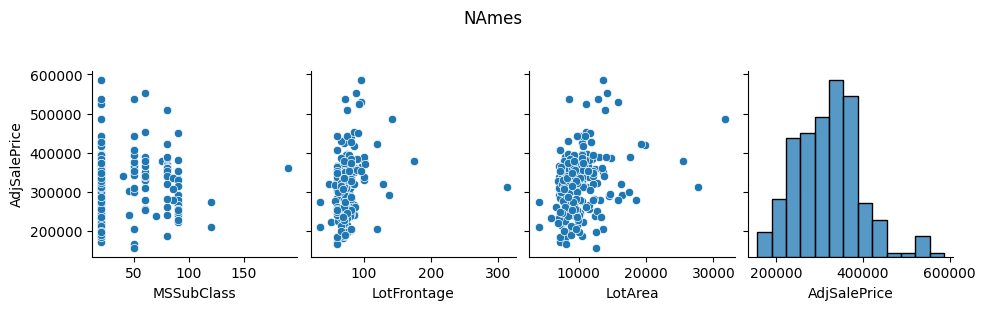

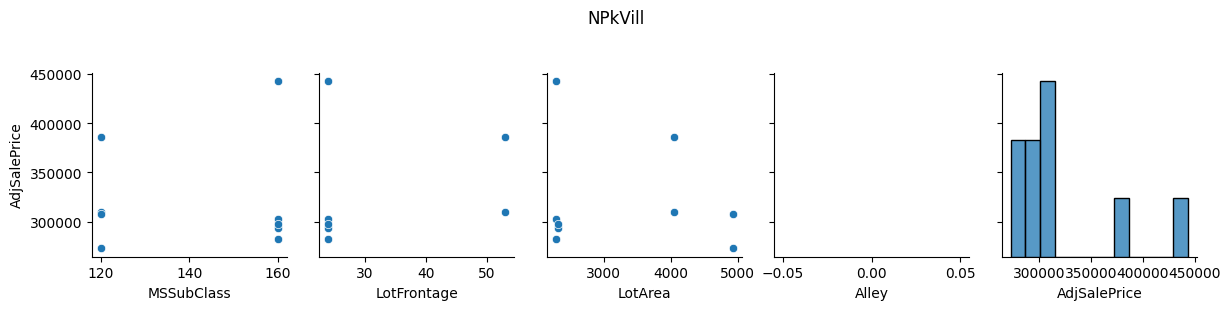

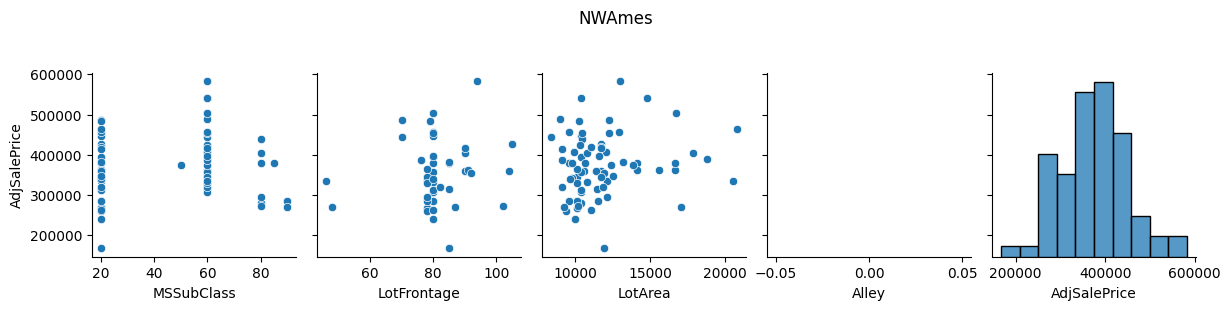

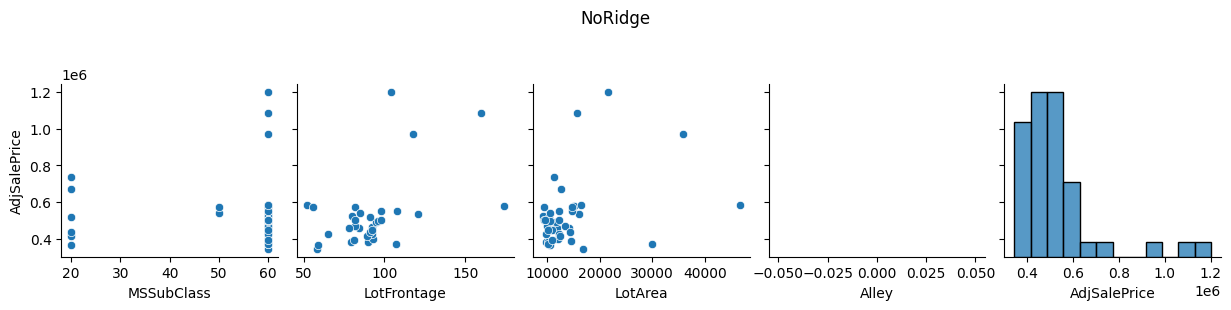

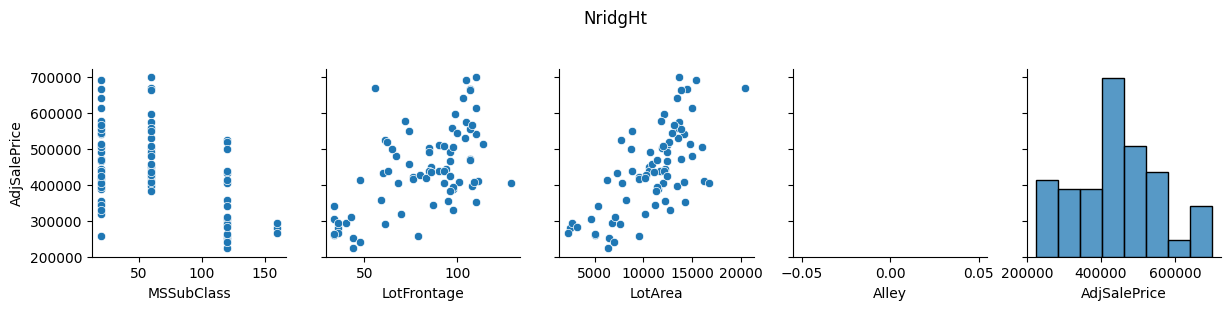

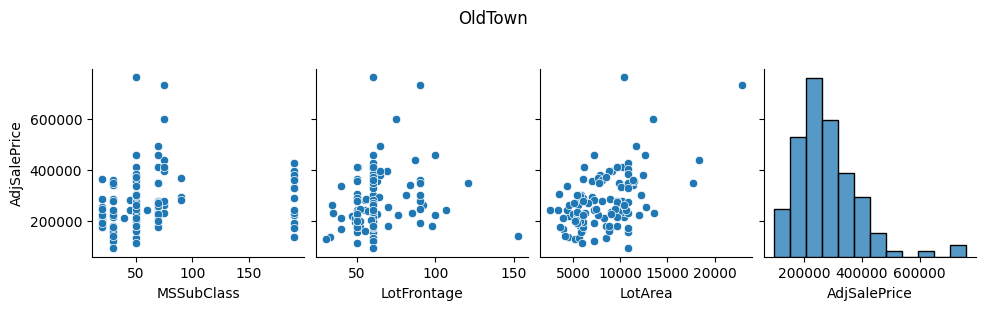

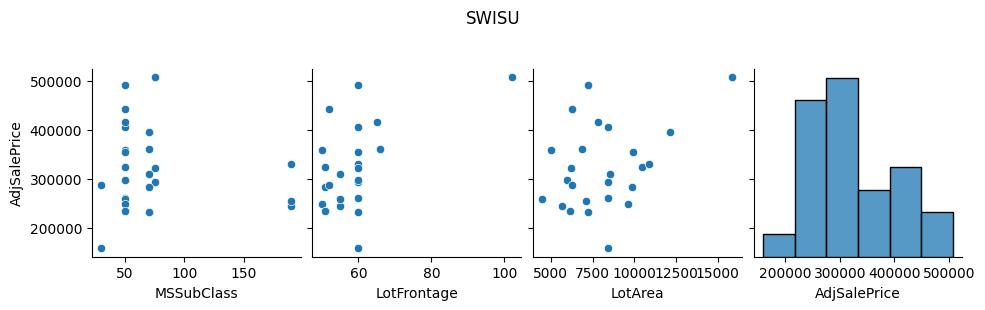

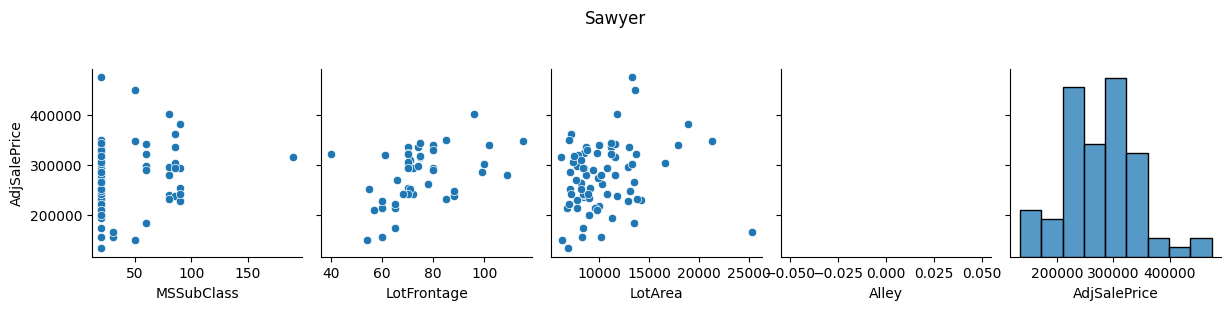

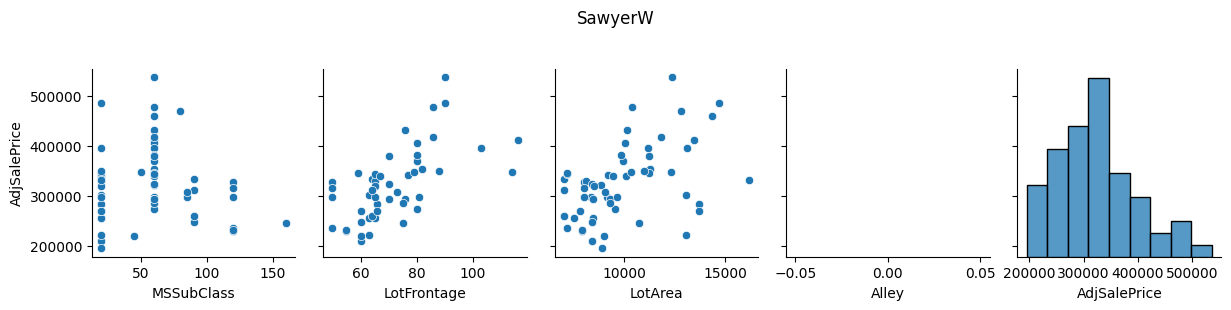

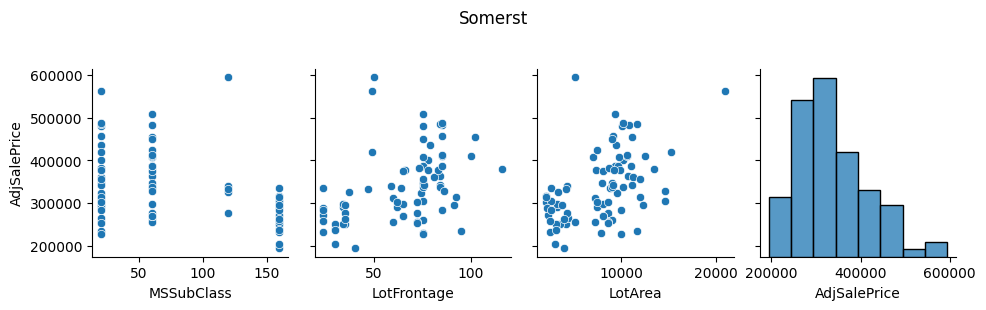

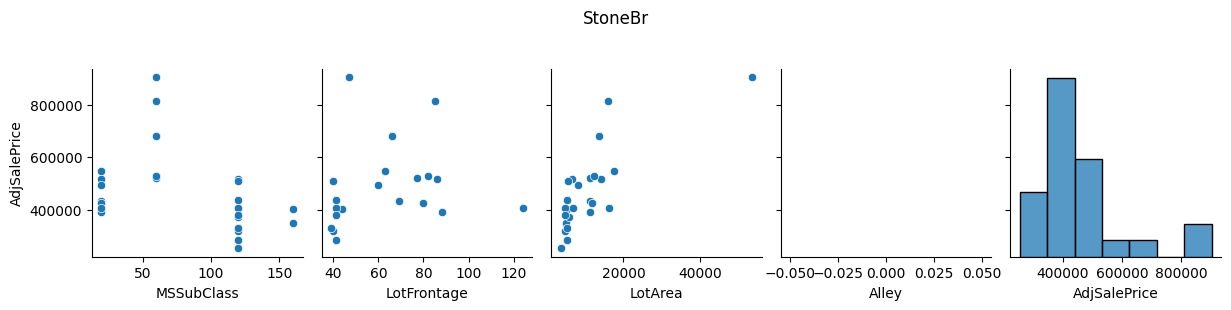

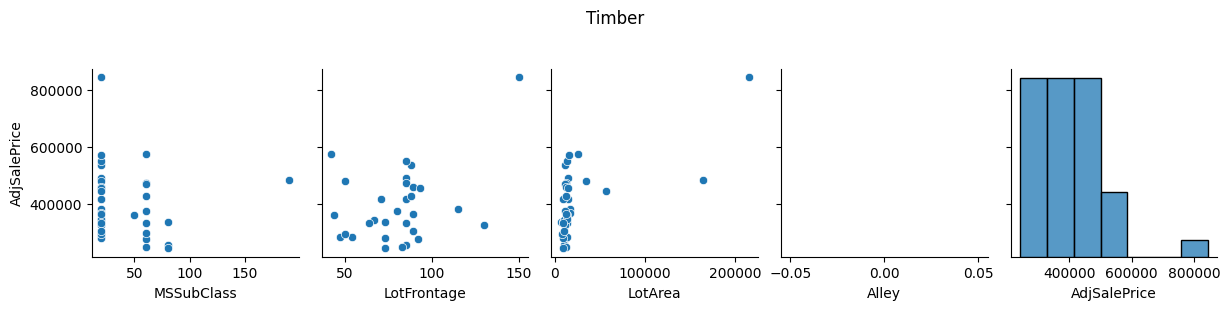

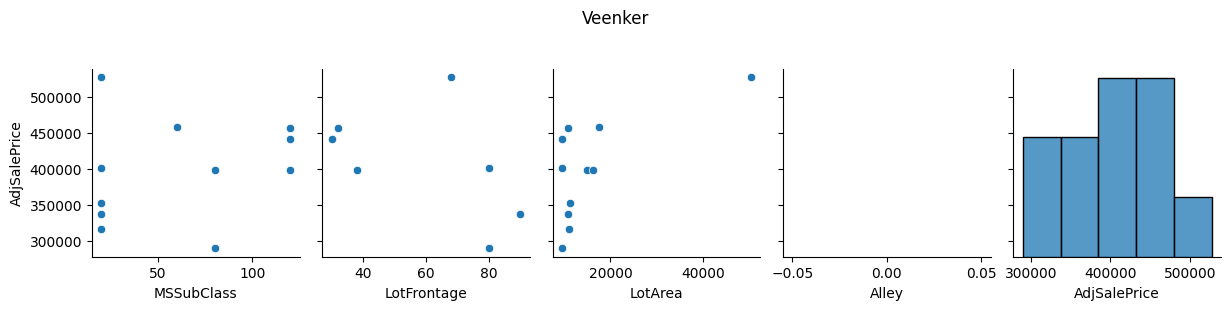

In [ ]:
ne = df_adjusted[['Neighborhood','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','AdjSalePrice']]
for area,neighborhood in ne.groupby('Neighborhood'):
#sns.pairplot(df, y_vars="A", x_vars=df.columns.values)
  #pd.plotting.scatter_matrix(ne.groupby('Neighborhood').get_group(area))
  sns.pairplot(ne.groupby('Neighborhood').get_group(area), y_vars='AdjSalePrice')
  plt.suptitle(area,y=1.2)



In [ ]:

ne.groupby('Neighborhood').corr()['AdjSalePrice'][ne.groupby('Neighborhood').corr()['AdjSalePrice']>0.4]

<ipython-input-8-492bc29b0e8a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ne.groupby('Neighborhood').corr()['AdjSalePrice'][ne.groupby('Neighborhood').corr()['AdjSalePrice']>0.4]
<ipython-input-8-492bc29b0e8a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ne.groupby('Neighborhood').corr()['AdjSalePrice'][ne.groupby('Neighborhood').corr()['AdjSalePrice']>0.4]


Neighborhood              
Blmngtn       AdjSalePrice    1.000000
Blueste       LotArea         1.000000
              AdjSalePrice    1.000000
BrDale        LotFrontage     0.410817
              AdjSalePrice    1.000000
BrkSide       AdjSalePrice    1.000000
ClearCr       AdjSalePrice    1.000000
CollgCr       AdjSalePrice    1.000000
Crawfor       AdjSalePrice    1.000000
Edwards       AdjSalePrice    1.000000
Gilbert       AdjSalePrice    1.000000
IDOTRR        AdjSalePrice    1.000000
MeadowV       LotFrontage     0.711650
              LotArea         0.767919
              AdjSalePrice    1.000000
Mitchel       AdjSalePrice    1.000000
NAmes         AdjSalePrice    1.000000
NPkVill       AdjSalePrice    1.000000
NWAmes        AdjSalePrice    1.000000
NoRidge       LotFrontage     0.483735
              AdjSalePrice    1.000000
NridgHt       LotFrontage     0.583067
              LotArea         0.692308
              AdjSalePrice    1.000000
OldTown       LotArea         0.51282

313.0

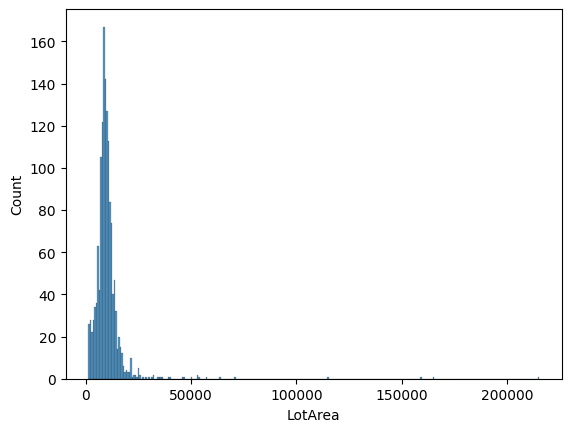

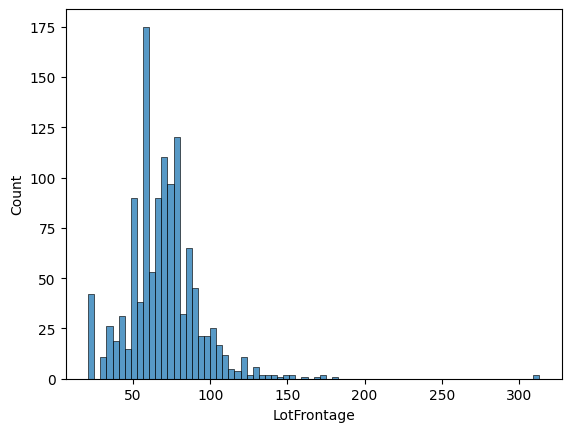

In [ ]:
sns.histplot(data=df_adjusted,x='LotArea')

plt.figure()
sns.histplot(df_adjusted,x='LotFrontage')
df_adjusted['LotFrontage'].max()

In [ ]:

#df_adjusted[['LotArea','LotAreaRanges','LotFrontage','LotFrontageRange']]
#sns.barplot(data=df_adjusted,x='LotAreaRange',y='AdjSalePrice')
#plt.figure(figsize=(30, 5))
#plt.xticks(rotation=45)
#sns.histplot(data=df_adjusted,x=df_adjusted['LotAreaRange'].astype(str))

(60, 80]      470
(40, 60]      349
(80, 100]     200
(20, 40]       98
(100, 120]     54
(120, 140]     17
(140, 160]      7
(160, 180]      3
(300, 320]      2
(180, 200]      1
(200, 220]      0
(220, 240]      0
(240, 260]      0
(260, 280]      0
(280, 300]      0
Name: LotFrontageRange, dtype: int64

In [ ]:
def significant(pvalue):
  if pvalue > 0.05:
    return 'No'
  else: return 'Yes'

def effect(np2value):
  if np2value <= 0.01:
    return 'Small'
  elif 0.01 < np2value <= 0.14:
    return 'Med'
  elif np2value > 0.14:
    return 'Large'


<ipython-input-11-6127111842b6>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Source  ddof1  ddof2          F         p-unc       np2 Significant  \
0   MSSubClass     14   1445  33.448768  3.723424e-78  0.244754         Yes   
0     MSZoning      4   1455  45.279563  6.982024e-36  0.110700         Yes   
0       Street      1   1458   2.661011  1.030513e-01  0.001822          No   
0        Alley      1     89  30.048398  3.890240e-07  0.252405         Yes   
0     LotShape      3   1456  37.920799  1.355116e-23  0.072471         Yes   
0  LandContour      3   1456  12.017545  8.984844e-08  0.024163         Yes   
0    Utilities      1   1458   0.417719  5.181793e-01  0.000286          No   
0    LotConfig      4   1455   8.132673  1.745797e-06  0.021869         Yes   
0    LandSlope      2   1457   2.049557  1.291631e-01  0.002806          No   
0   Condition1      8   1451   6.184827  7.086808e-08  0.032975         Yes   
0   Condition2      7   1452   2.138055  3.709952e-02  0.010202         Yes   
0     BldgType      4   1455  12.501769  5.302353e-10  0.033227         Yes   
0   HouseStyle      7   1452  19.452257  5.244138e-25  0.085738         Yes   

  Effect on Price Variable  
0                    Large  
0                      Med  
0                    Small  
0                    Large  
0                      Med  
0                      Med  
0                    Small  
0                      Med  
0                    Small  
0                      Med  
0                      Med  
0                      Med  
0                      Med

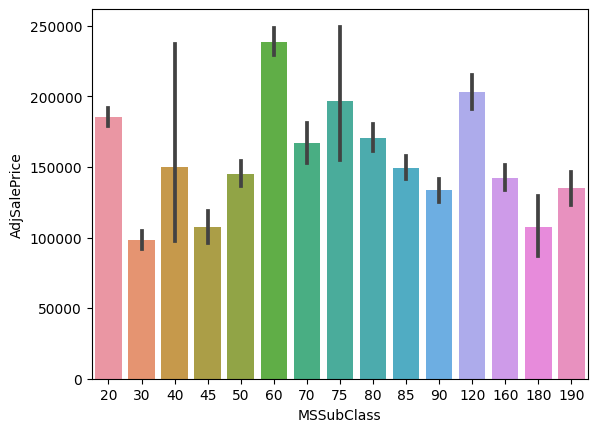

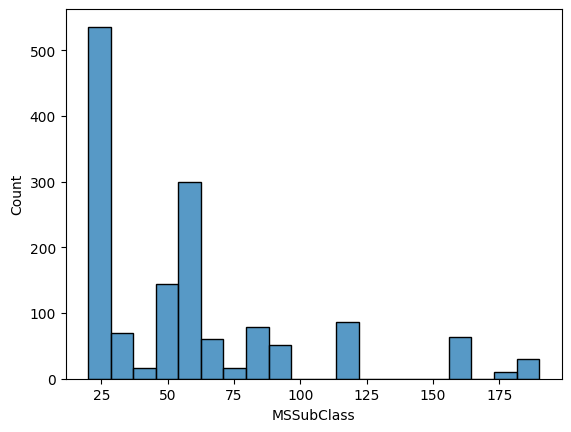

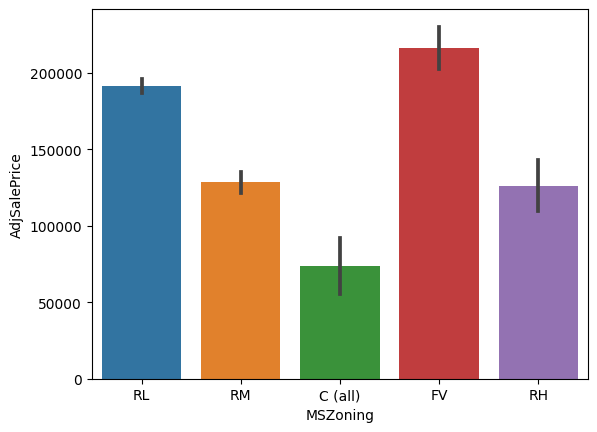

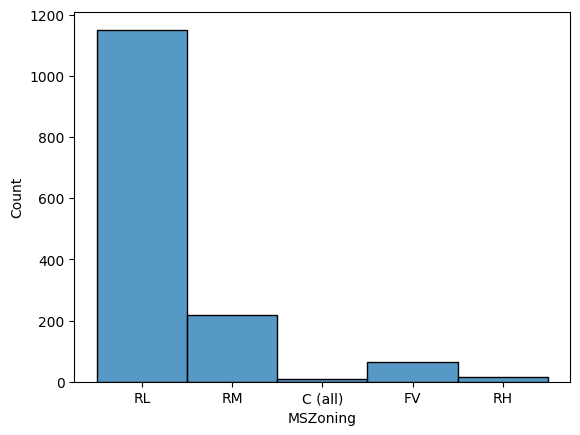

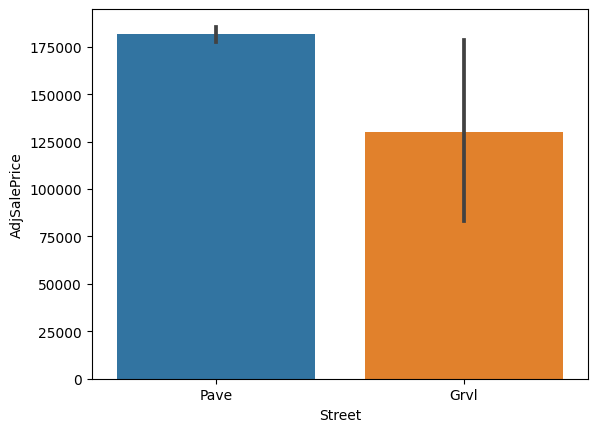

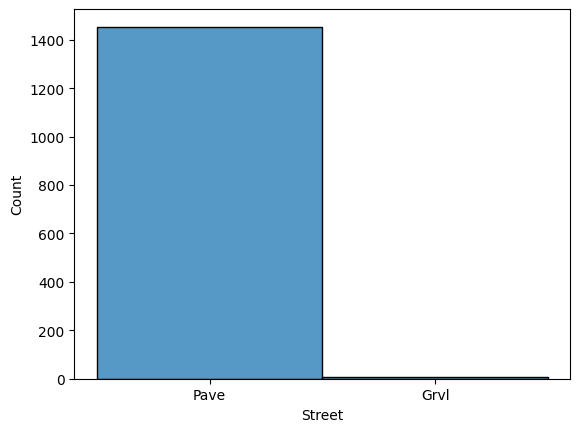

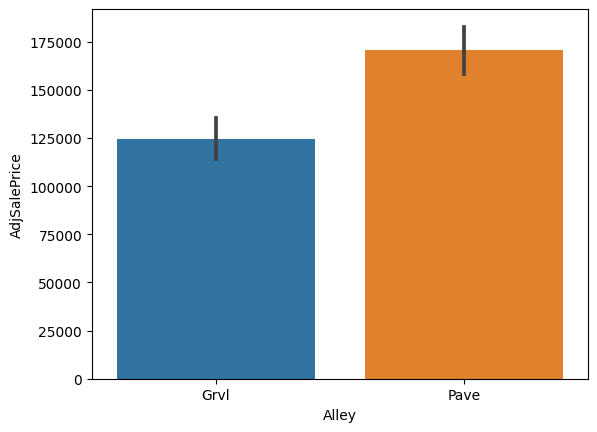

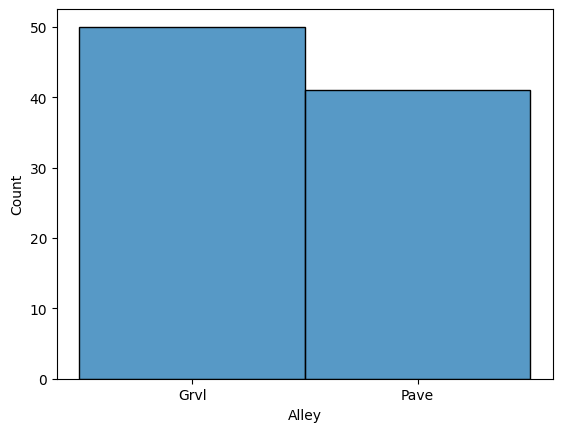

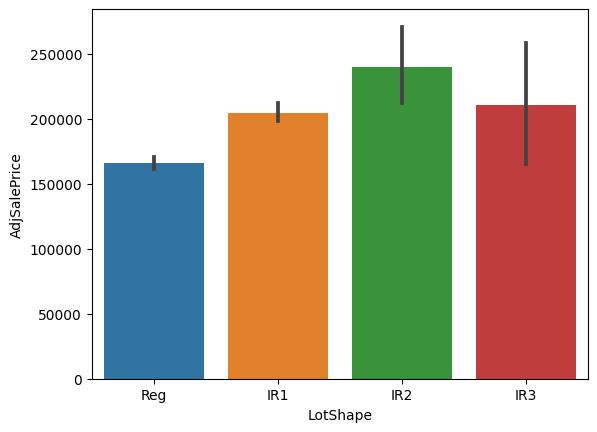

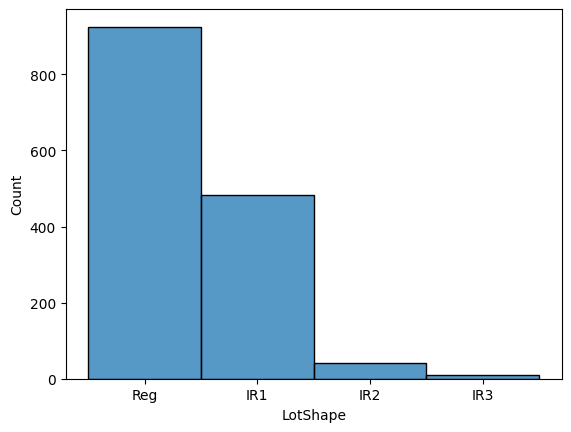

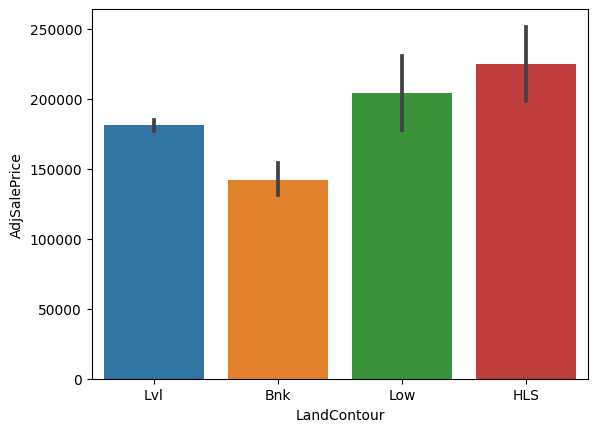

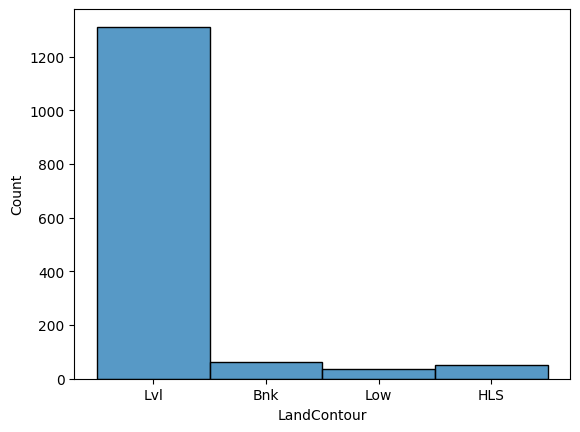

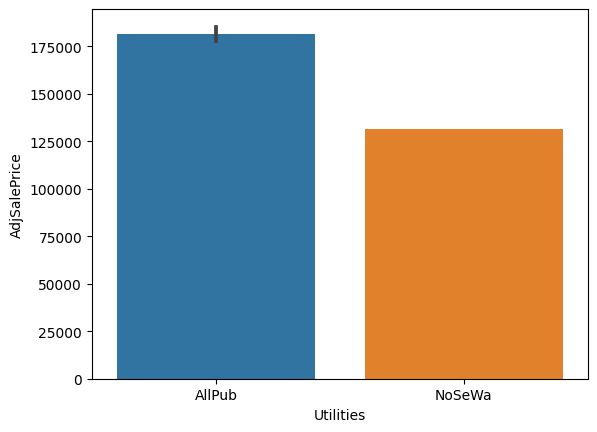

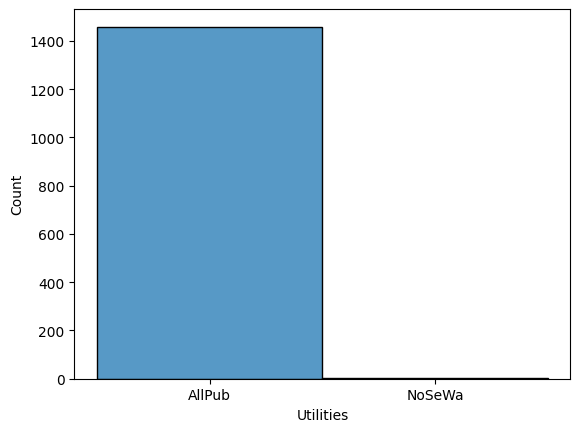

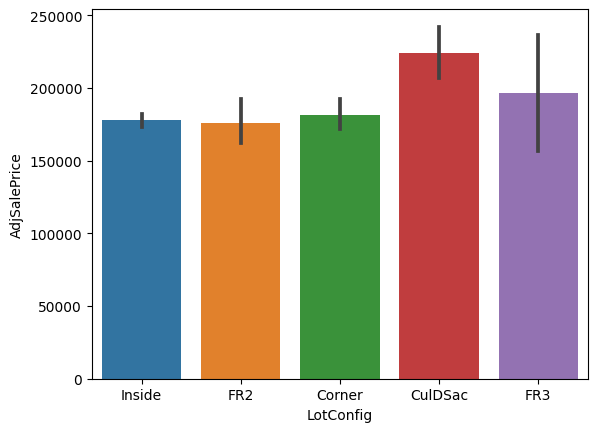

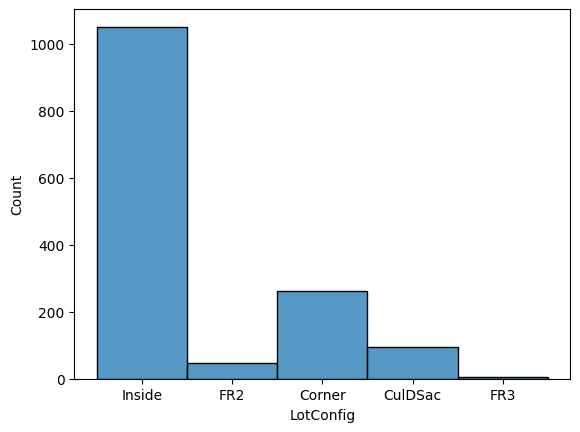

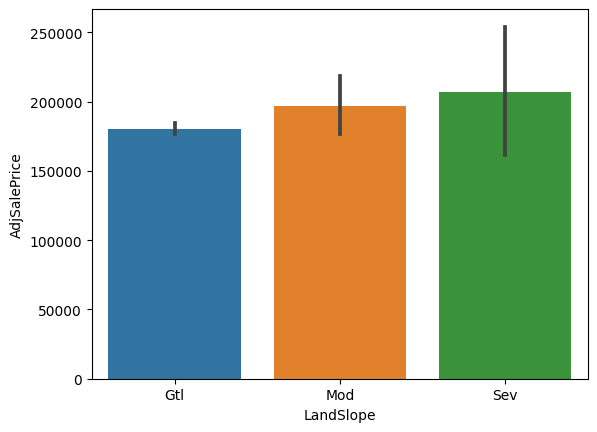

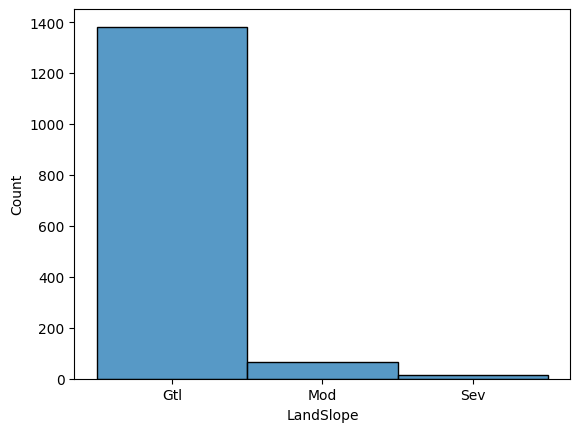

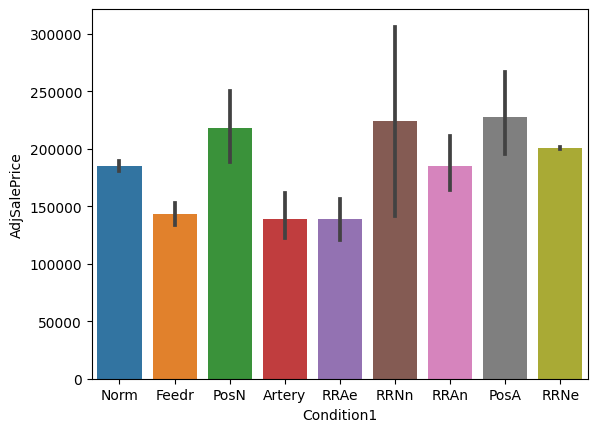

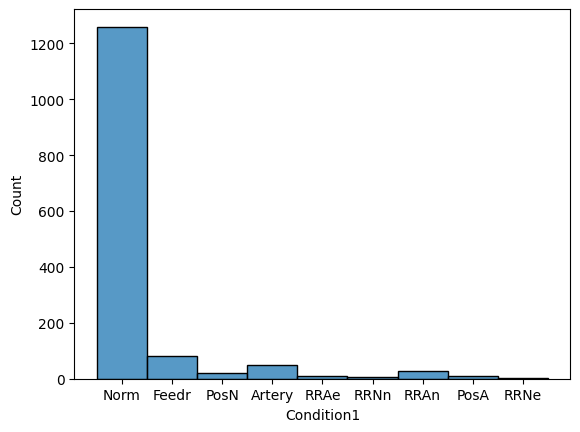

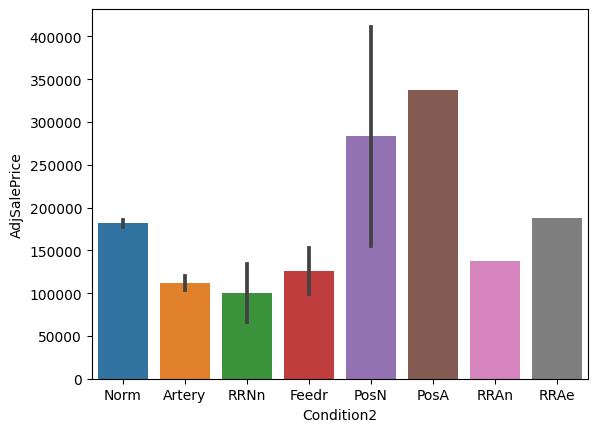

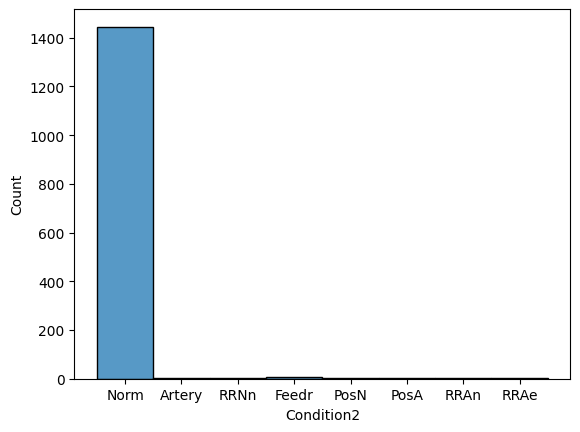

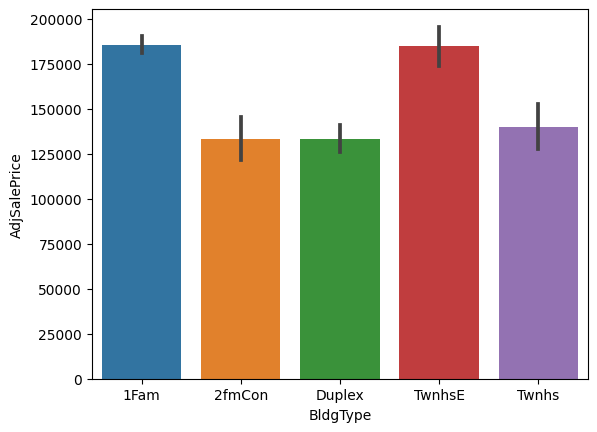

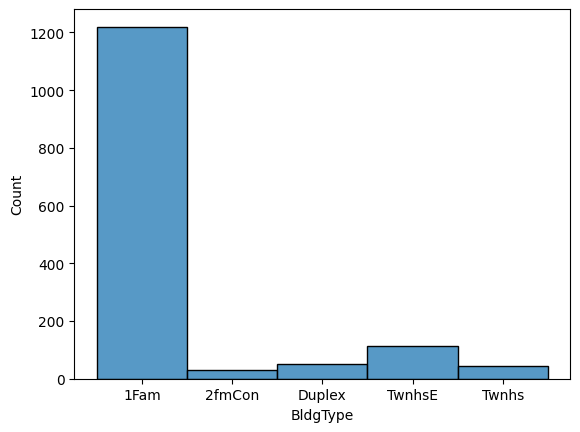

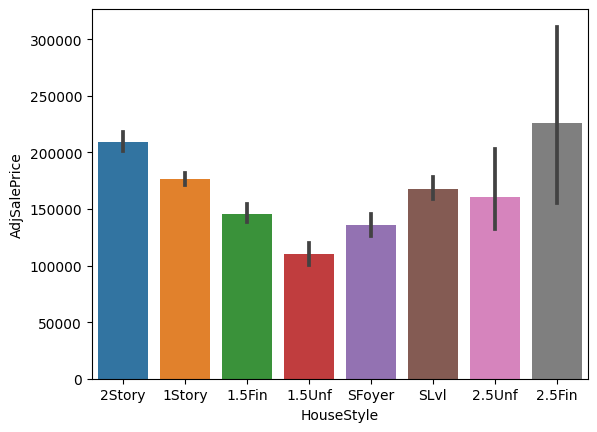

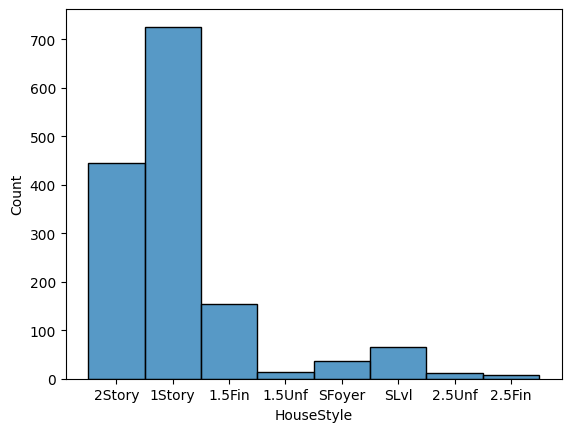

<Figure size 640x480 with 0 Axes>

In [ ]:
ne_cat=ne.drop(['Neighborhood','LotFrontage','LotArea'],axis=1)
list_results = []
for column in ne_cat.iloc[:, :-1]:
  anova = pg.anova(dv='AdjSalePrice', between=column, data=ne_cat)
  sns.barplot(data = ne_cat, x = ne_cat[column], y = ne_cat['AdjSalePrice'])
  plt.figure()
  sns.histplot(data = ne_cat, x = ne_cat[column])
  list_results.append(anova)
  plt.figure()
df_results = pd.concat(list_results, axis=0)
df_results['Significant']=df_results['p-unc'].apply(significant)
df_results['Effect on Price Variable'] = df_results['np2'].apply(effect)
df_results

In [ ]:
df_adjusted['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

<Axes: xlabel='BsmtFinSF1', ylabel='AdjSalePrice'>

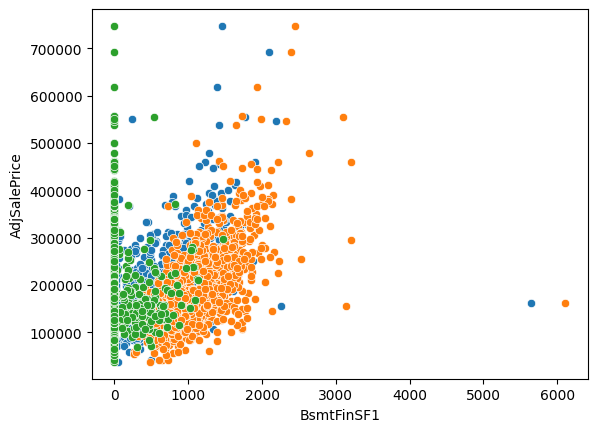

In [ ]:
df_adjusted[['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','AdjSalePrice']].corr()
#pg.anova(dv='AdjSalePrice', between='BsmtFinSF1', data=df_adjusted)
#pg.anova(dv='AdjSalePrice', between='BsmtFinSF2', data=df_adjusted)
pg.anova(dv='AdjSalePrice', between='TotalBsmtSF', data=df_adjusted)
sns.scatterplot(data = df_adjusted, x = df_adjusted['BsmtFinSF1'], y = df_adjusted['AdjSalePrice'])
sns.scatterplot(data = df_adjusted, x = df_adjusted['TotalBsmtSF'], y = df_adjusted['AdjSalePrice'])
sns.scatterplot(data = df_adjusted, x = df_adjusted['BsmtFinSF2'], y = df_adjusted['AdjSalePrice'])

- clean up data by removing outliers
- lot frontage, lot area, alley, mssubclass

<Axes: xlabel='ExterQual', ylabel='Count'>

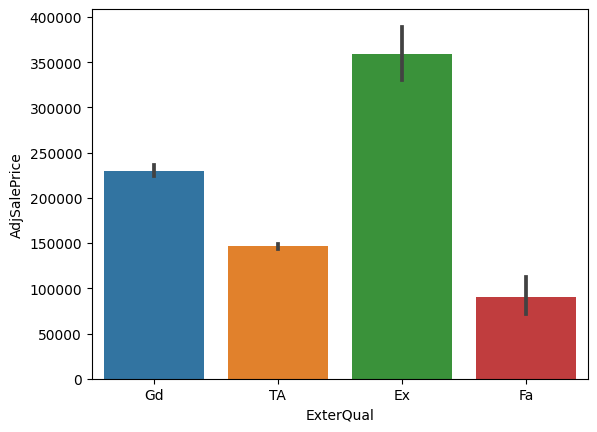

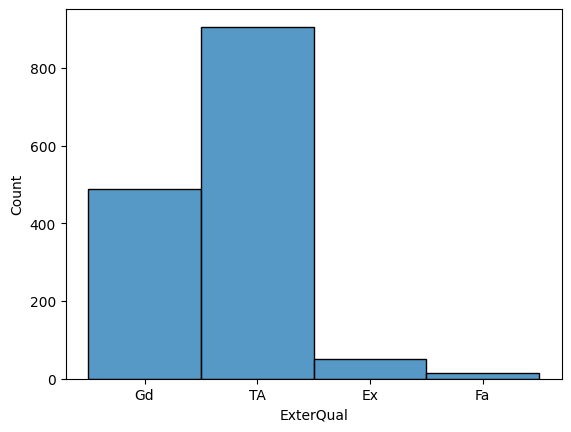

In [ ]:

sns.barplot(data=df_adjusted,x=df_adjusted['ExterQual'],y=df_adjusted['AdjSalePrice'])
plt.figure()
sns.histplot(data=df_adjusted,x=df_adjusted['ExterQual'])

In [ ]:
pg.anova(dv='AdjSalePrice', between='ExterQual', data=df_adjusted)


Source  ddof1  ddof2          F          p-unc       np2
0  ExterQual      3   1456  416.37263  2.925699e-195  0.461761

In [ ]:
df_adjusted.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [ ]:
df_adjusted[['MSSubClass','Neighborhood']].groupby('Neighbor')

MSSubClass Neighborhood
1459          20      Edwards
888           20        NAmes
889           20        NAmes
892           20       Sawyer
893           20       Sawyer
...          ...          ...
520          190      OldTown
1266         190      OldTown
48           190      OldTown
1062         190      OldTown
861          190       Sawyer

[1460 rows x 2 columns]

<Axes: xlabel='Fireplaces', ylabel='AdjSalePrice'>

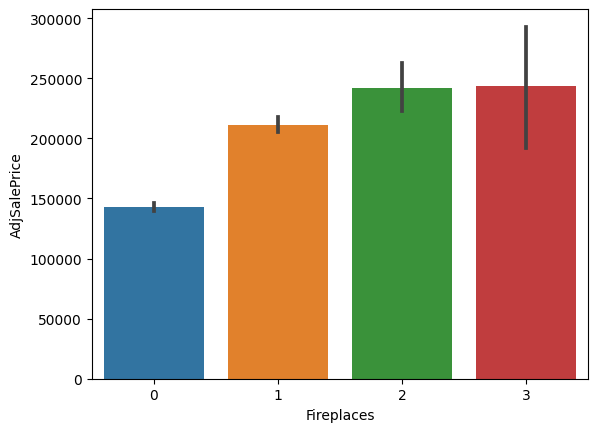

In [ ]:
sns.barplot(data=df_adjusted, x = 'Fireplaces', y = 'AdjSalePrice')

Working on LotFrontage and LotArea

Steps
1. Clean up data - fill in the blanks, remove outliers (within 2 std div)
2. Group the data by neighborhood
3. Test the effect of each attribute individually to see which on has the higher correlation to price. Compare the mean between the highest and lowst of each group and maybe a heatmap.
4. (Group) look across all attributes


In [ ]:
df_adjusted[['LotArea','LotFrontage']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [4]:
df_adjusted['LotFrontage'].fillna(df_adjusted['LotFrontage'].mean(),inplace=True)

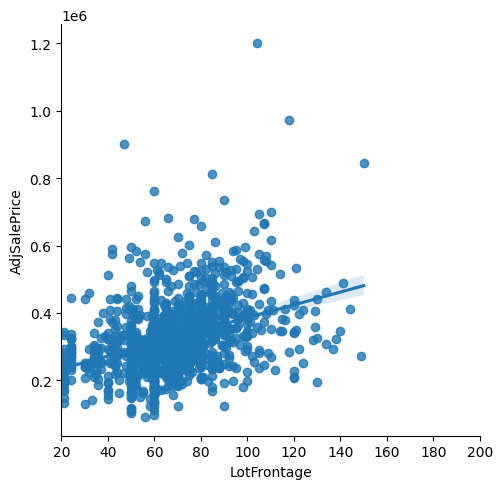

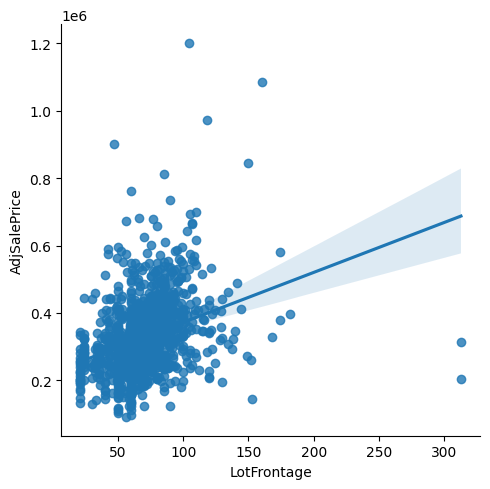

<Figure size 640x480 with 0 Axes>

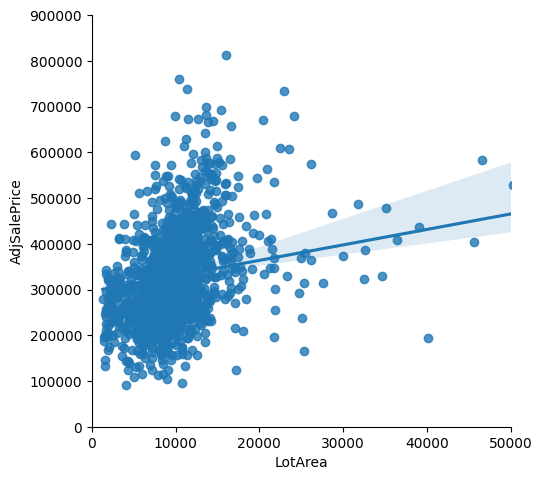

In [ ]:
g1 = sns.lmplot(data=df_adjusted[df_adjusted['LotFrontage']<151],x='LotFrontage',y='AdjSalePrice',fit_reg=True,ci=95)
g1.set(xlim = (20,200))
sns.lmplot(data=df_adjusted, x = "LotFrontage",y = 'AdjSalePrice')
plt.figure()
g = sns.lmplot(data=df_adjusted,x='LotArea',y='AdjSalePrice',fit_reg=True,ci=95)
g.set(ylim = (0,900000),xlim=(0,50000))


In [5]:
df_adjusted[df_adjusted['LotFrontage']<151][['LotFrontage','AdjSalePrice']].corr()
core_data = df_adjusted[df_adjusted['LotArea']<80000][df_adjusted['LotFrontage']<151][['LotFrontage','LotArea','AdjSalePrice']]

<ipython-input-5-696a93c1f6f2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  core_data = df_adjusted[df_adjusted['LotArea']<80000][df_adjusted['LotFrontage']<151][['LotFrontage','LotArea','AdjSalePrice']]


<Axes: xlabel='LotFrontage', ylabel='LotArea'>

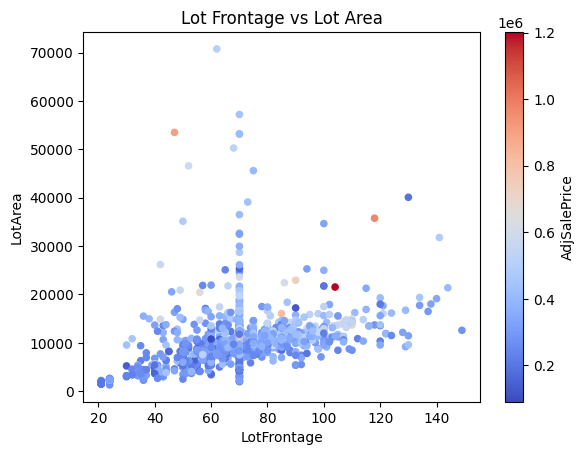

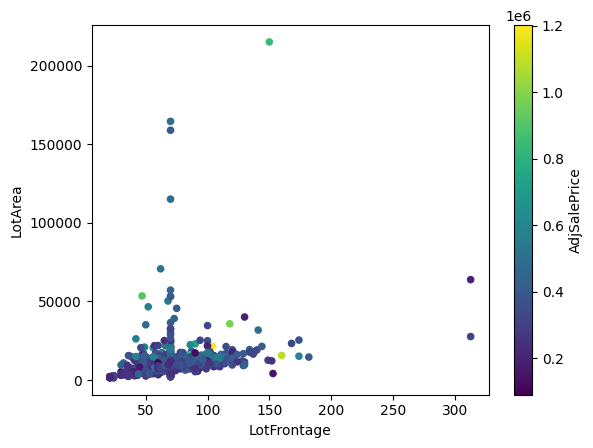

In [40]:
g1 = core_data.plot(kind="scatter", x="LotFrontage", y="LotArea", alpha=1,
    c="AdjSalePrice", cmap="coolwarm", colorbar=True,
    sharex=False)
plt.title("Lot Frontage vs Lot Area")
plt.savefig('frontage vs area scatter')
df_adjusted.plot(kind="scatter", x="LotFrontage", y="LotArea", alpha=1,
    c="AdjSalePrice", cmap="viridis", colorbar=True,
    sharex=False)

#g1.set(xlim=(100,120))

334

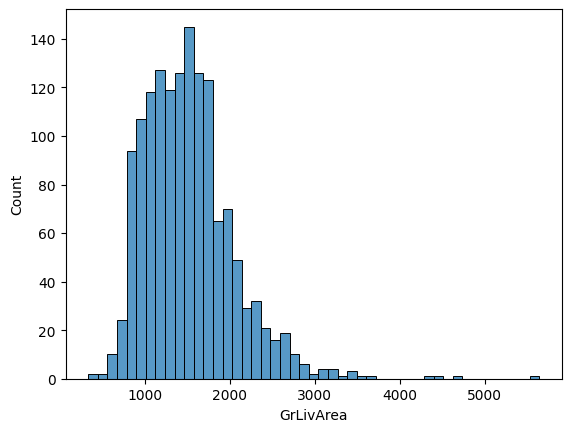

In [ ]:
sns.histplot(df_adjusted,x='GrLivArea')
df_adjusted['GrLivArea'].min()

In [10]:
area_bins = range(0,250000,5000)
frontage_bins = range(20,340,20)
bsmt_bins = range(0,7000,100)
livarea_bins = range(300,6000,100)
df_adjusted['TotalBsmtSFRange'] = pd.cut(df_adjusted['TotalBsmtSF'],bsmt_bins)
df_adjusted['GrLivAreaRange'] = pd.cut(df_adjusted['GrLivArea'],livarea_bins)
df_adjusted['LotAreaRange'] = pd.cut(df_adjusted['LotArea'],area_bins)
df_adjusted['LotAreaRange'].value_counts()
df_adjusted['LotFrontageRange'] = pd.cut(df_adjusted['LotFrontage'],frontage_bins)
df_adjusted['LotFrontageRange'].value_counts()

(60, 80]      729
(40, 60]      349
(80, 100]     200
(20, 40]       98
(100, 120]     54
(120, 140]     17
(140, 160]      7
(160, 180]      3
(300, 320]      2
(180, 200]      1
(200, 220]      0
(220, 240]      0
(240, 260]      0
(260, 280]      0
(280, 300]      0
Name: LotFrontageRange, dtype: int64

Text(0.5, 1.0, 'Lot Frontage vs Lot Area Binned')

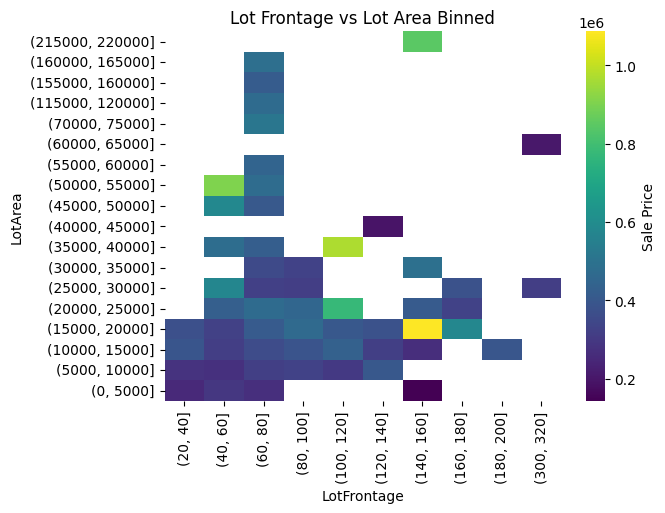

In [43]:
pvt = df_adjusted.pivot_table(index='LotAreaRange', columns='LotFrontageRange', values='AdjSalePrice')
sns.heatmap(data=pvt, cbar_kws={'label': 'Sale Price'}, cmap='viridis').set(
     ylabel='LotArea', xlabel='LotFrontage')
plt.gca().invert_yaxis()
plt.title('Lot Frontage vs Lot Area Binned')

In [ ]:
df_new = df_adjusted.groupby(["LotFrontageRange", "LotAreaRange"], as_index = False)["AdjSalePrice"].mean()
df_new.dropna().sort_values(by='AdjSalePrice',ascending=False).head(10).sort_values(by='LotFrontageRange',ascending=True)

LotFrontageRange      LotAreaRange  AdjSalePrice
59          (40, 60]    (50000, 55000]  9.027636e+05
58          (40, 60]    (45000, 50000]  5.840334e+05
54          (40, 60]    (25000, 30000]  5.751929e+05
102         (60, 80]    (20000, 25000]  5.350134e+05
108         (60, 80]    (50000, 55000]  5.276915e+05
203       (100, 120]    (35000, 40000]  9.718143e+05
200       (100, 120]    (20000, 25000]  7.745894e+05
297       (140, 160]    (15000, 20000]  1.086160e+06
337       (140, 160]  (215000, 220000]  8.452389e+05
346       (160, 180]    (15000, 20000]  5.798678e+05

In [ ]:
df_w_n = df_adjusted.groupby(["LotFrontageRange", "LotAreaRange",'Neighborhood'], as_index = False)["AdjSalePrice"].mean()
test1 = []
for area,neighborhood in df_adjusted.groupby('Neighborhood'):

  neigh = df_w_n.dropna().groupby('Neighborhood').get_group(area).sort_values(by='AdjSalePrice',ascending=False).head(10).sort_values(by='LotFrontageRange')
  test1.append(neigh)

df_top_neigh = pd.concat(test1, axis=0)
df_top_neigh.sort_values(by='Neighborhood')

LotFrontageRange    LotAreaRange Neighborhood   AdjSalePrice
1225         (40, 60]       (0, 5000]      Blmngtn  297613.179834
1            (20, 40]       (0, 5000]      Blueste  300510.202503
2            (20, 40]       (0, 5000]       BrDale  263790.986036
1278         (40, 60]  (10000, 15000]      BrkSide  314535.536145
1253         (40, 60]   (5000, 10000]      BrkSide  268424.831484
...               ...             ...          ...            ...
2499         (60, 80]   (5000, 10000]      Veenker  345489.007052
49           (20, 40]   (5000, 10000]      Veenker  441254.756076
74           (20, 40]  (10000, 15000]      Veenker  428082.173191
2724         (60, 80]  (50000, 55000]      Veenker  527691.504020
3749        (80, 100]  (10000, 15000]      Veenker  337871.895316

[189 rows x 4 columns]

In [ ]:
for area,neighborhood in df_adjusted.groupby('Neighborhood'):

  series_test = df_w_n.dropna().groupby('Neighborhood').get_group(area).sort_values(by='AdjSalePrice',ascending=False).head(10)
  print(series_test)


     LotFrontageRange LotAreaRange Neighborhood   AdjSalePrice
1225         (40, 60]    (0, 5000]      Blmngtn  297613.179834
  LotFrontageRange LotAreaRange Neighborhood   AdjSalePrice
1         (20, 40]    (0, 5000]      Blueste  300510.202503
  LotFrontageRange LotAreaRange Neighborhood   AdjSalePrice
2         (20, 40]    (0, 5000]       BrDale  263790.986036
     LotFrontageRange    LotAreaRange Neighborhood   AdjSalePrice
2478         (60, 80]   (5000, 10000]      BrkSide  517359.629976
7453       (140, 160]  (20000, 25000]      BrkSide  411499.933195
2503         (60, 80]  (10000, 15000]      BrkSide  393669.106725
3703        (80, 100]   (5000, 10000]      BrkSide  334845.400584
1278         (40, 60]  (10000, 15000]      BrkSide  314535.536145
1253         (40, 60]   (5000, 10000]      BrkSide  268424.831484
1228         (40, 60]       (0, 5000]      BrkSide  244398.291324
     LotFrontageRange    LotAreaRange Neighborhood   AdjSalePrice
2804         (60, 80]  (70000, 75000]   

<ipython-input-12-47a5093b9846>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


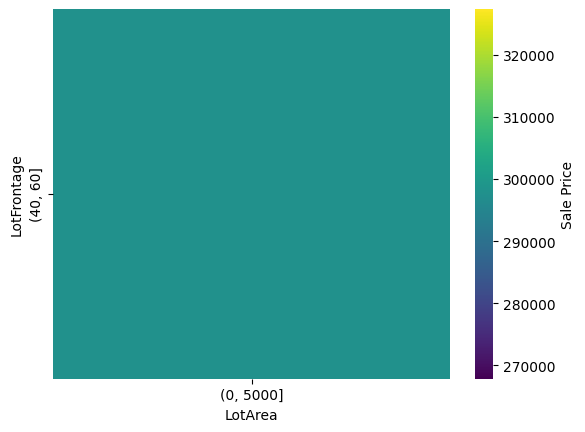

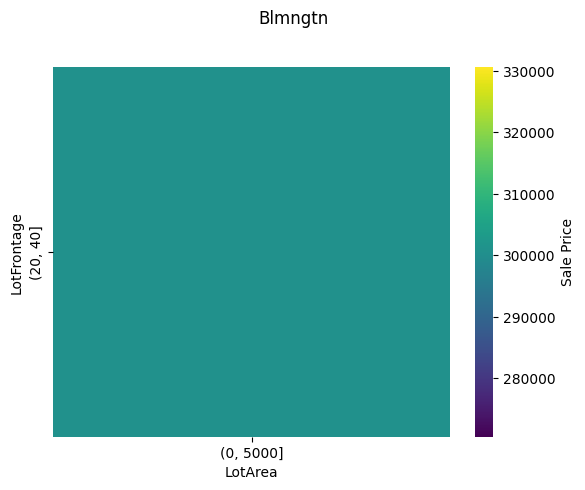

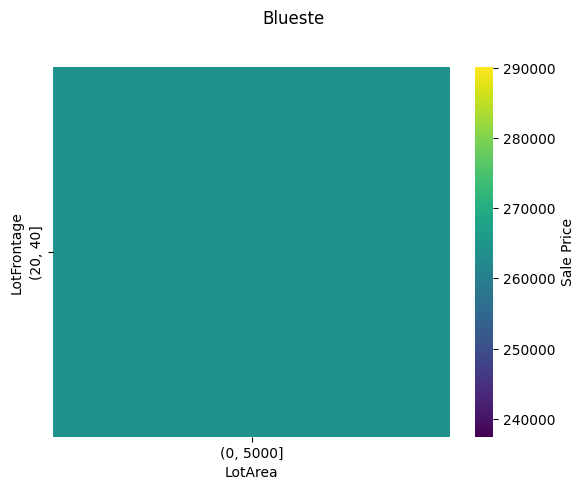

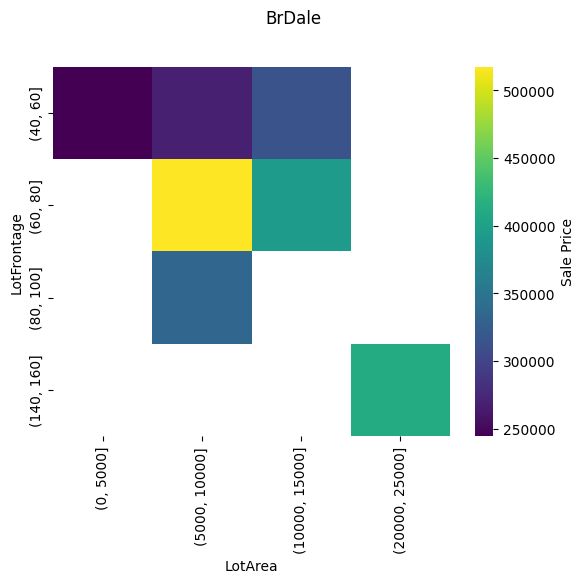

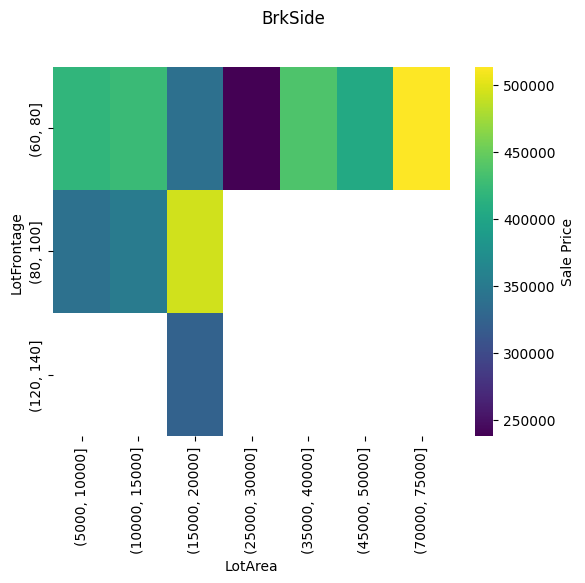

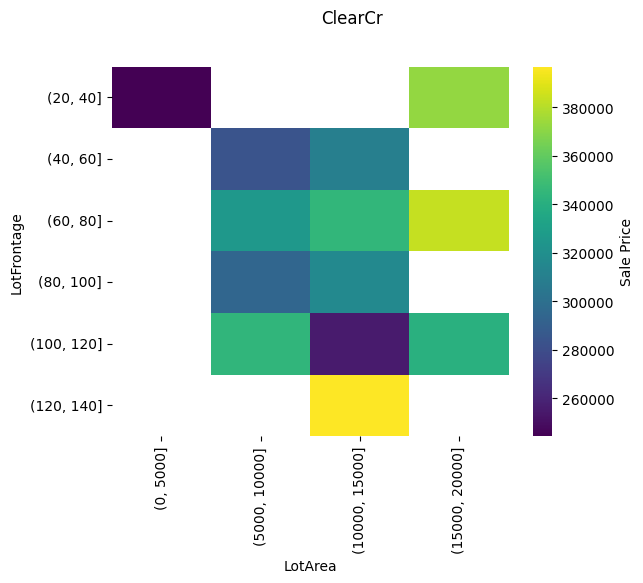

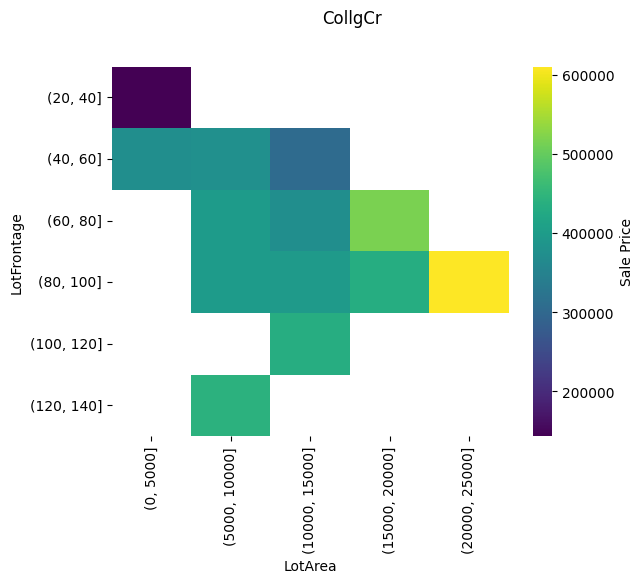

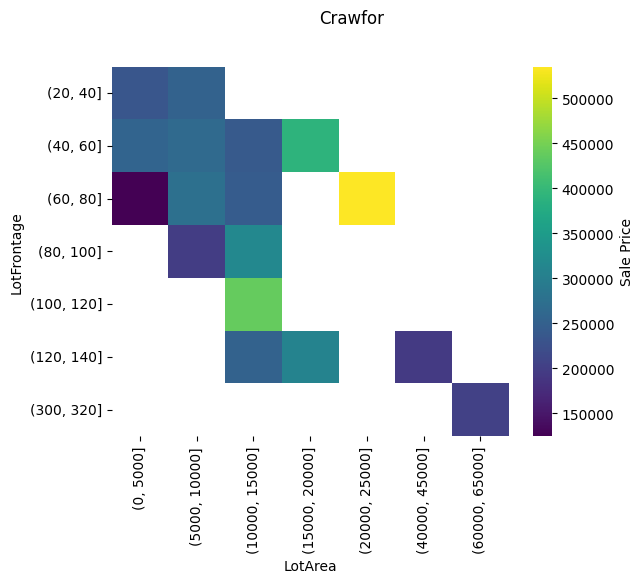

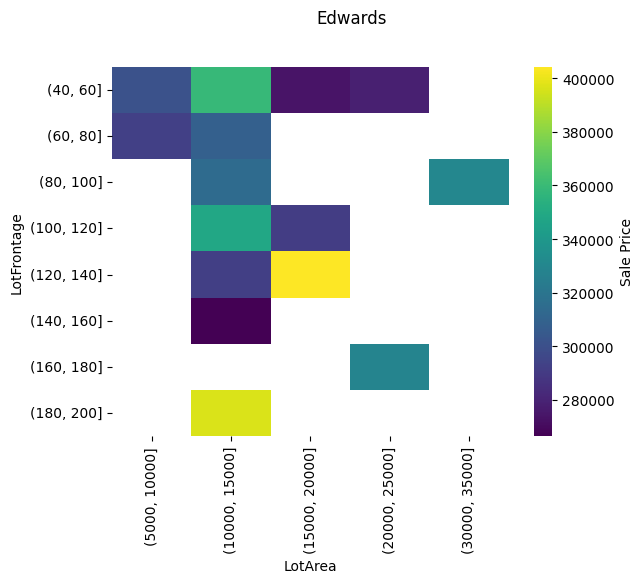

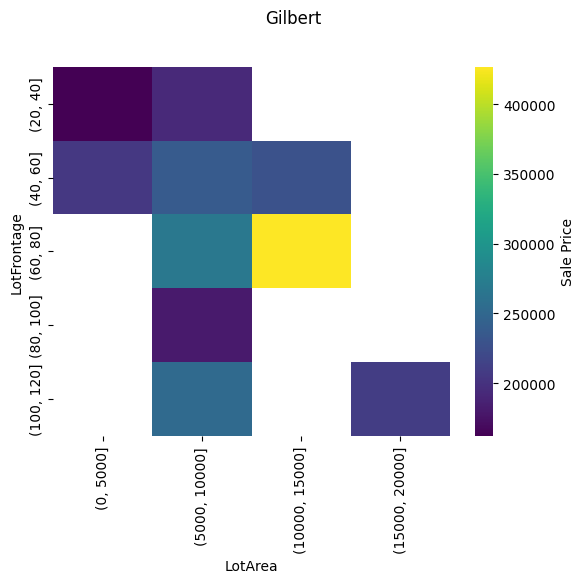

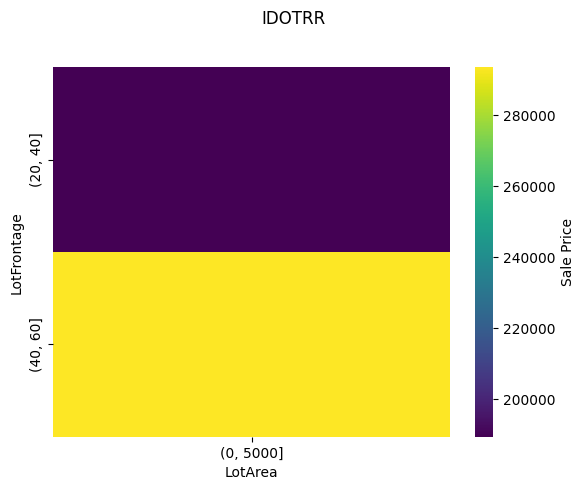

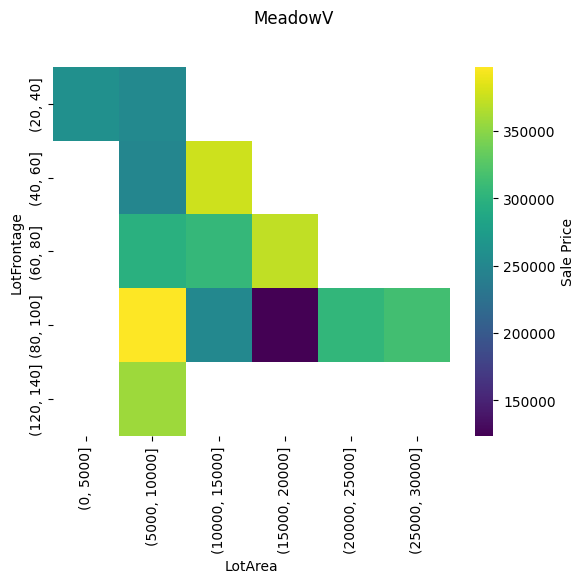

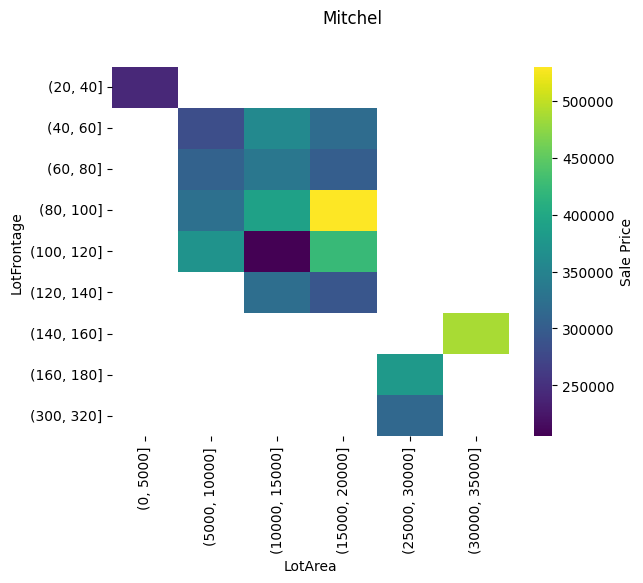

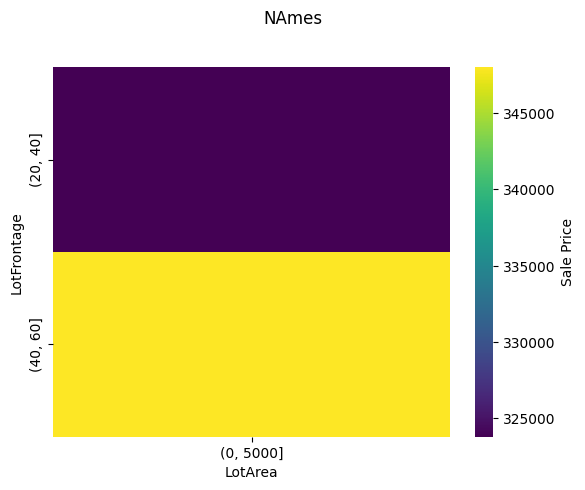

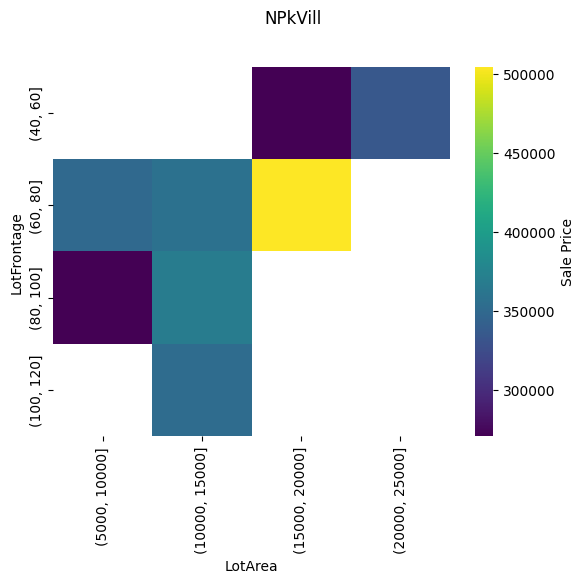

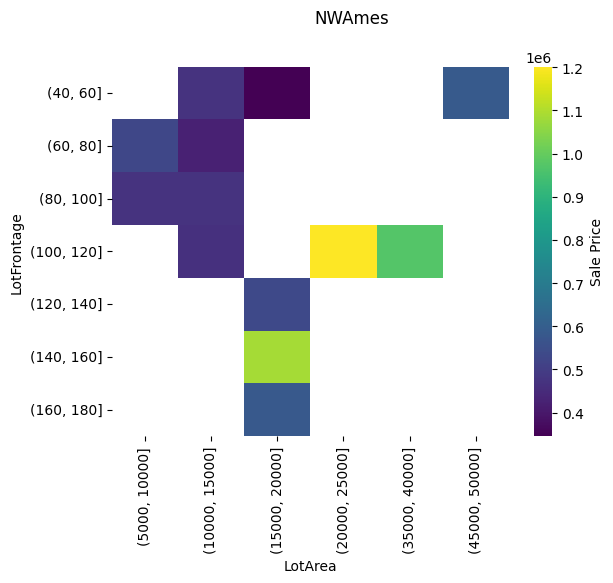

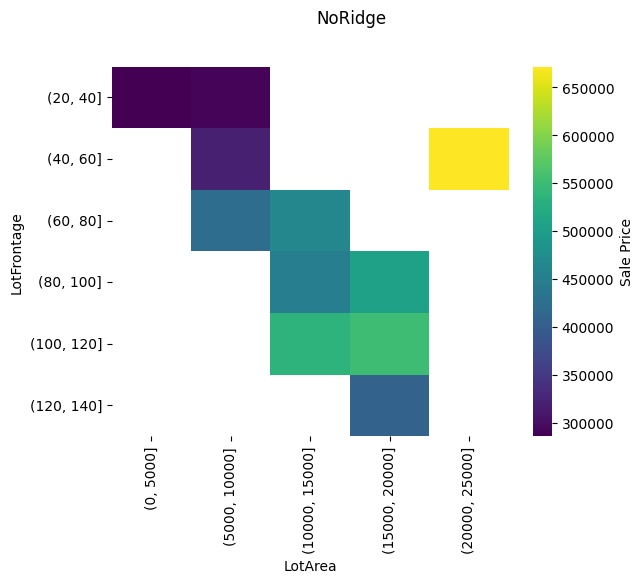

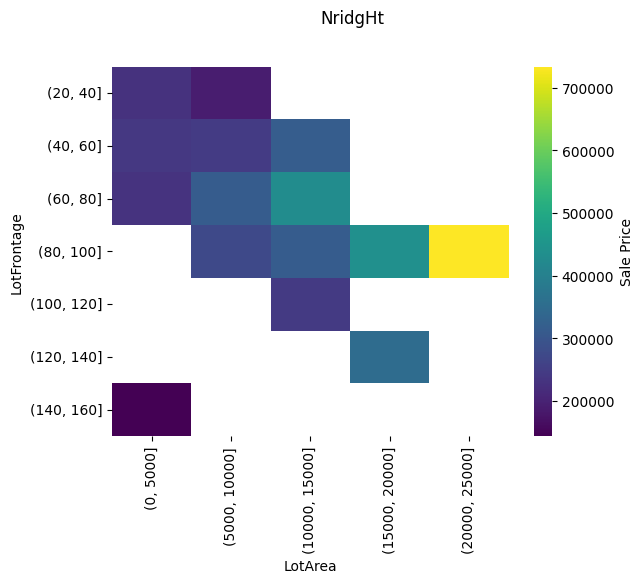

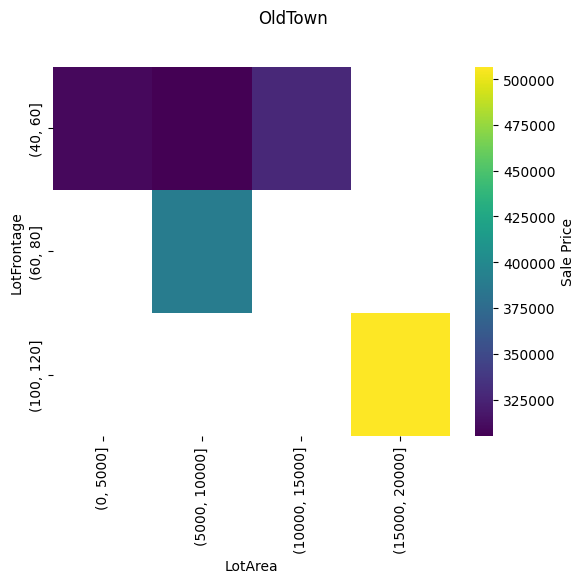

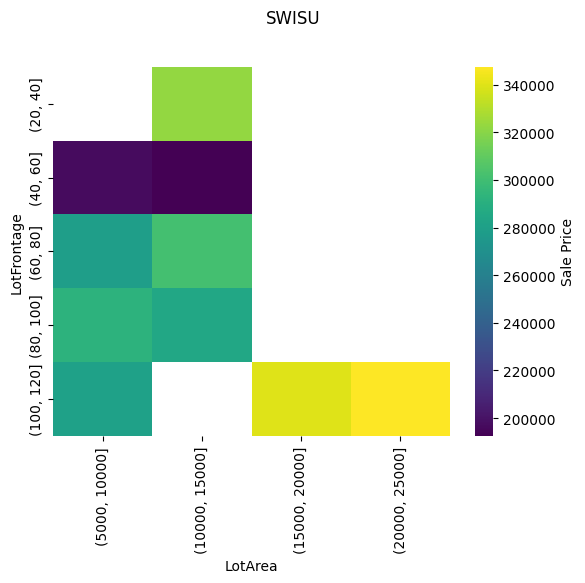

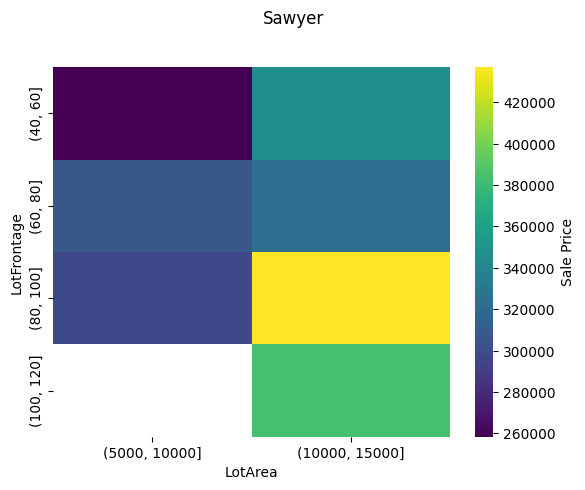

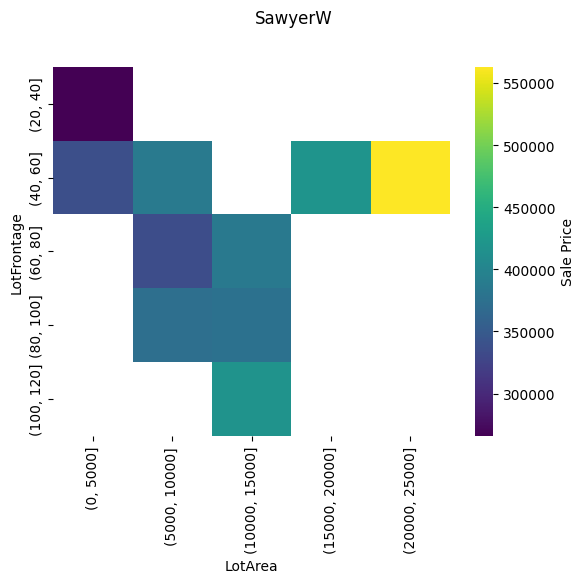

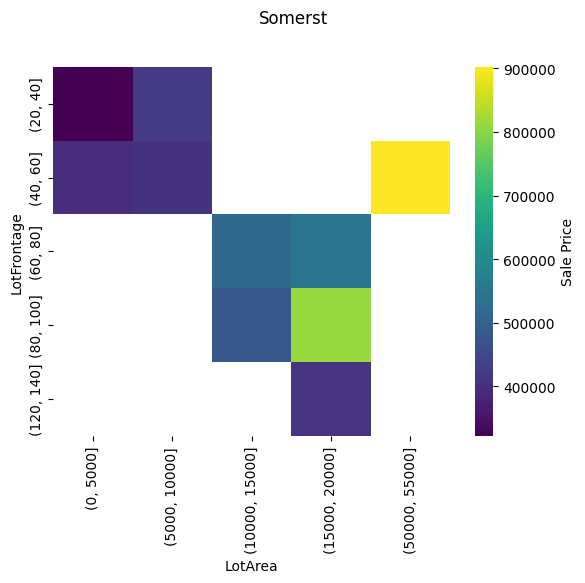

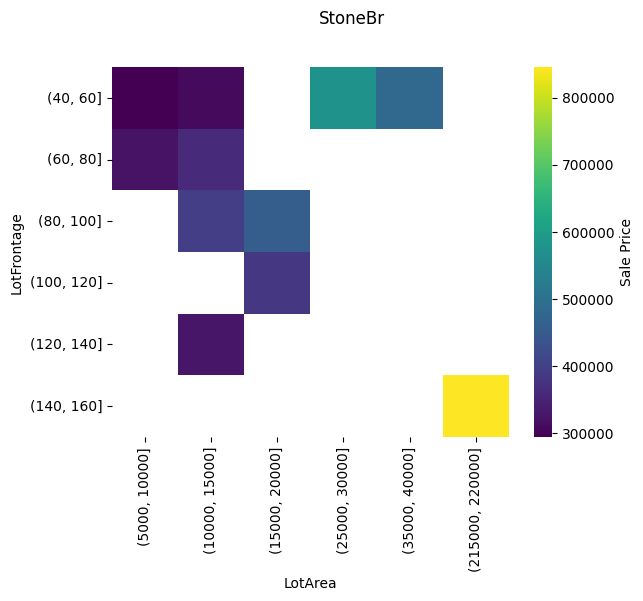

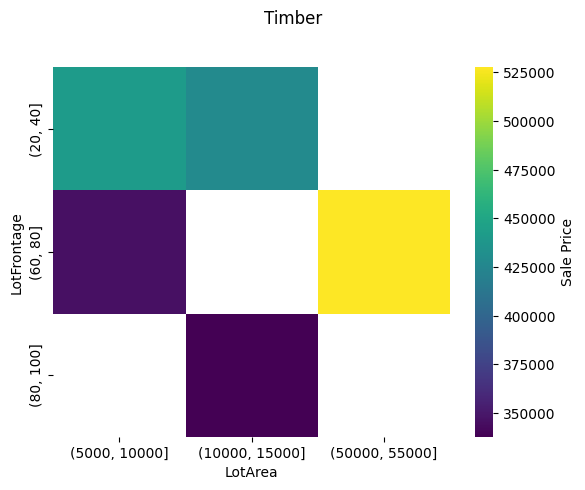

<Figure size 640x480 with 0 Axes>

In [ ]:
ne = df_adjusted[['Neighborhood','LotFrontage','LotArea','AdjSalePrice']]
for area,neighborhood in df_adjusted.groupby('Neighborhood'):

#sns.pairplot(df, y_vars="A", x_vars=df.columns.values)
  #pd.plotting.scatter_matrix(ne.groupby('Neighborhood').get_group(area))
  #ne.groupby('Neighborhood').get_group(area).plot(kind="scatter", x="LotFrontage", y="LotArea", alpha=1,
   # c="AdjSalePrice", cmap="coolwarm", colorbar=True,
    #sharex=False)
  pvt = df_adjusted.groupby('Neighborhood').get_group(area).pivot_table(index='LotFrontageRange', columns='LotAreaRange', values='AdjSalePrice')
  sns.heatmap(data=pvt, cbar_kws={'label': 'Sale Price'}, cmap='viridis').set(ylabel='LotFrontage', xlabel='LotArea')
  plt.figure()


  plt.suptitle(area,y=1)

In [ ]:
df_interest = df_adjusted[['LotFrontageRange','LotAreaRange','MSSubClass', 'BsmtQual', 'TotalBsmtSFRange', 'HeatingQC', 'GrLivAreaRange', 'GarageType', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']]

pairwise_combinations = list(combinations(df_interest.columns, 2))

for i in enumerate(range(19)):
    col1 = pairwise_combinations[i[0]][0]
    col2 = pairwise_combinations[i[0]][1]
    print(col1)

    print(col2)


LotFrontageRange
LotAreaRange
LotFrontageRange
MSSubClass
LotFrontageRange
BsmtQual
LotFrontageRange
TotalBsmtSFRange
LotFrontageRange
HeatingQC
LotFrontageRange
GrLivAreaRange
LotFrontageRange
GarageType
LotFrontageRange
GarageCars
LotFrontageRange
FullBath
LotFrontageRange
TotRmsAbvGrd
LotAreaRange
MSSubClass
LotAreaRange
BsmtQual
LotAreaRange
TotalBsmtSFRange
LotAreaRange
HeatingQC
LotAreaRange
GrLivAreaRange
LotAreaRange
GarageType
LotAreaRange
GarageCars
LotAreaRange
FullBath
LotAreaRange
TotRmsAbvGrd


In [54]:
df_interest = df_adjusted[['MSSubClass', 'LotFrontageRange', 'LotAreaRange', 'BsmtQual', 'TotalBsmtSFRange', 'HeatingQC', 'GrLivAreaRange', 'GarageType', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']]

pairwise_combinations = list(combinations(df_interest.columns, 2))
#for area,neighborhood in df_adjusted.groupby('Neighborhood'):
#  for i in pairwise_combinations:
#    col1 = i[0]
#    col2 = i[1]
#    pvt = df_adjusted.groupby('Neighborhood').get_group(area).pivot_table(index=col1, columns=col2, values='AdjSalePrice')
#    sns.heatmap(data=pvt, cbar_kws={'label': 'Sale Price'}, cmap='viridis').set(ylabel=col1, xlabel=col2)
#    plt.figure()
#    plt.suptitle(area,y=1)
#


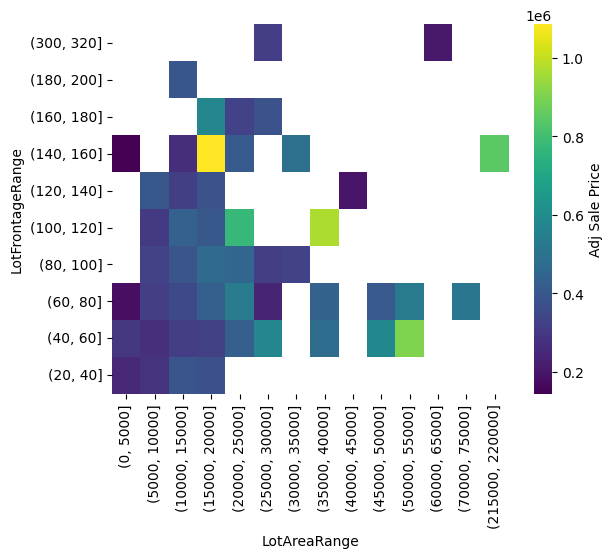

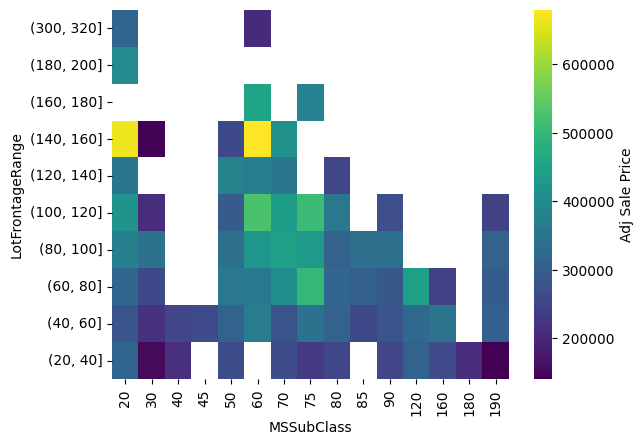

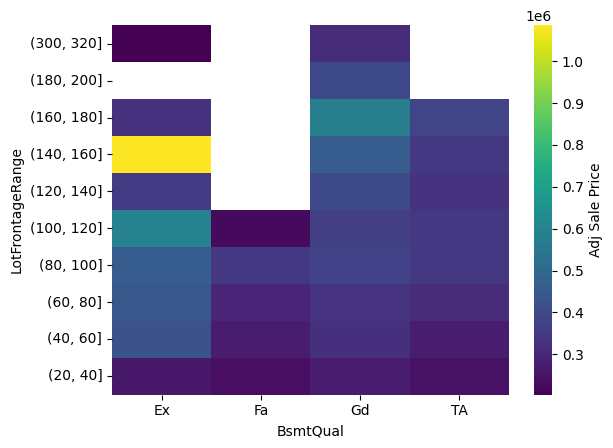

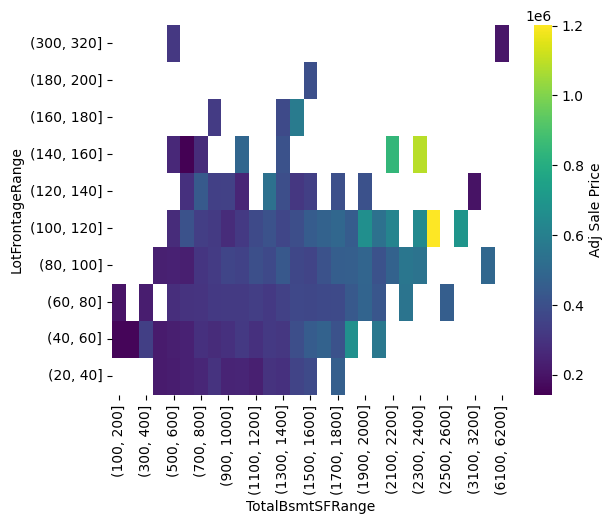

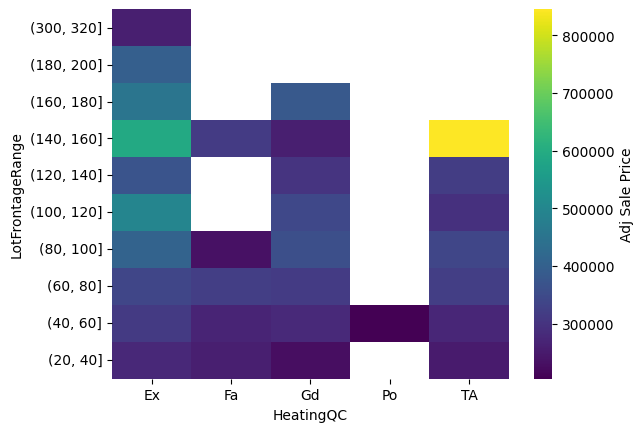

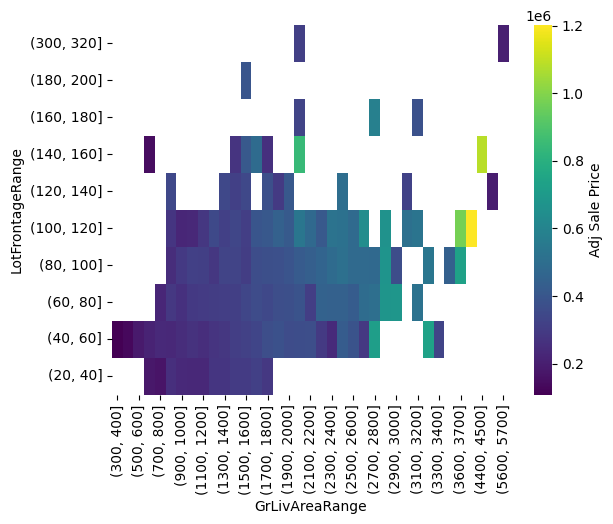

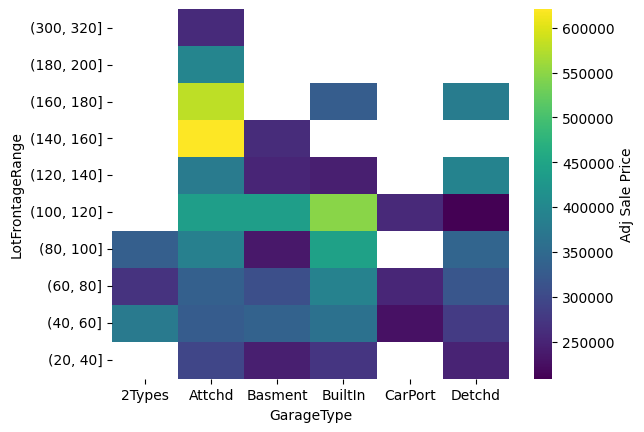

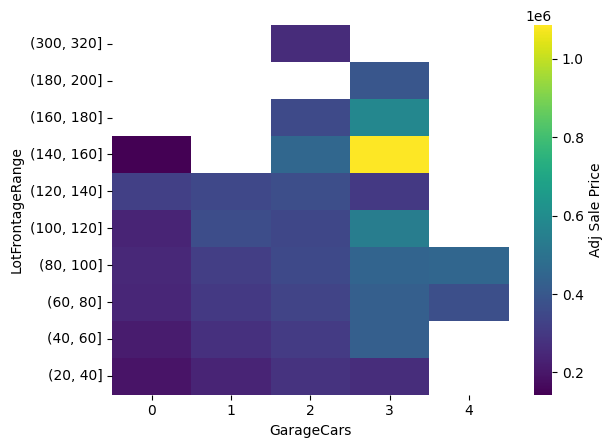

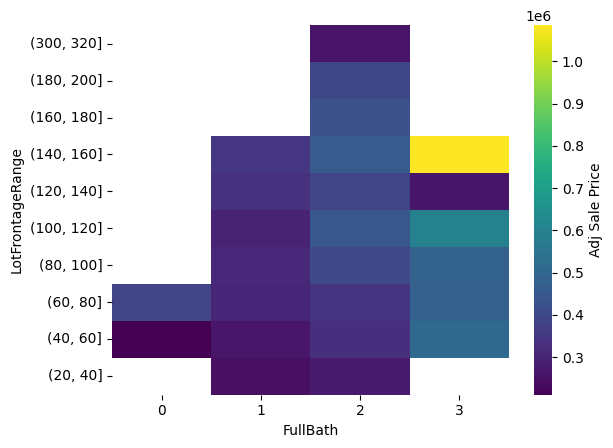

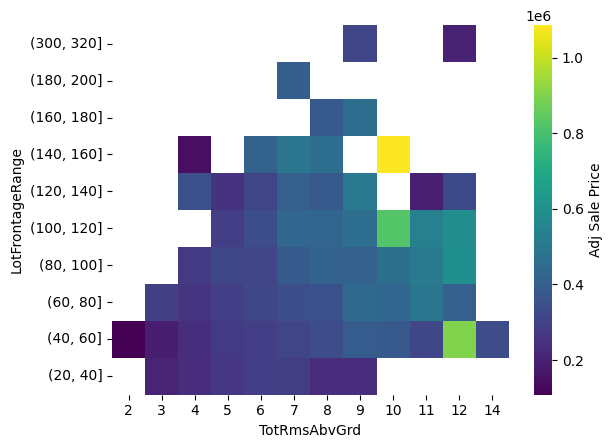

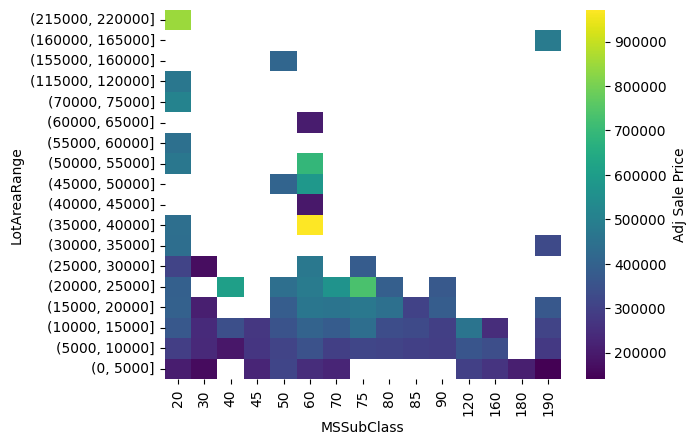

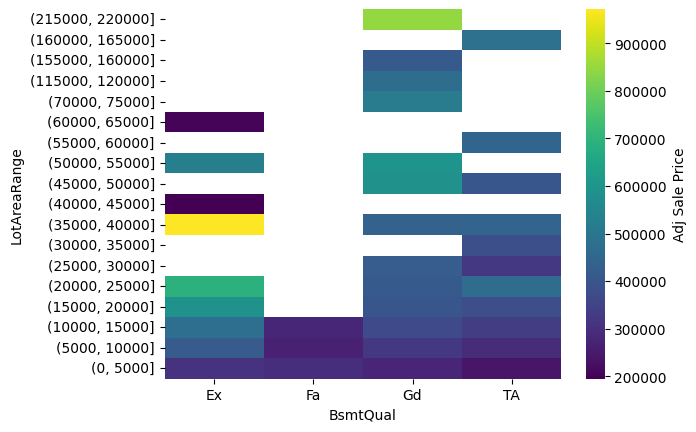

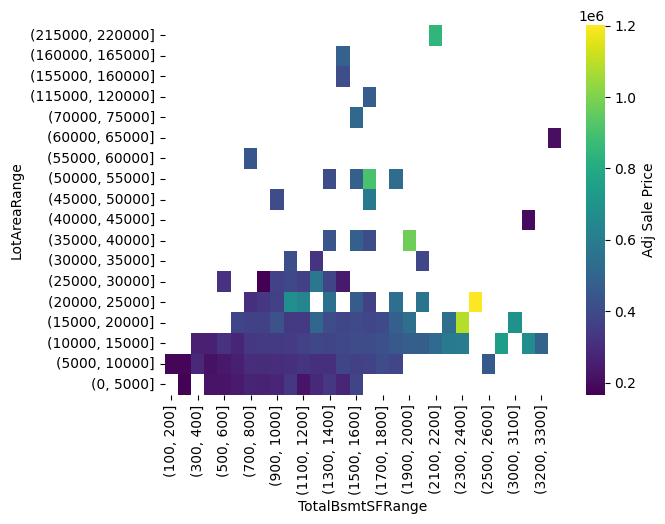

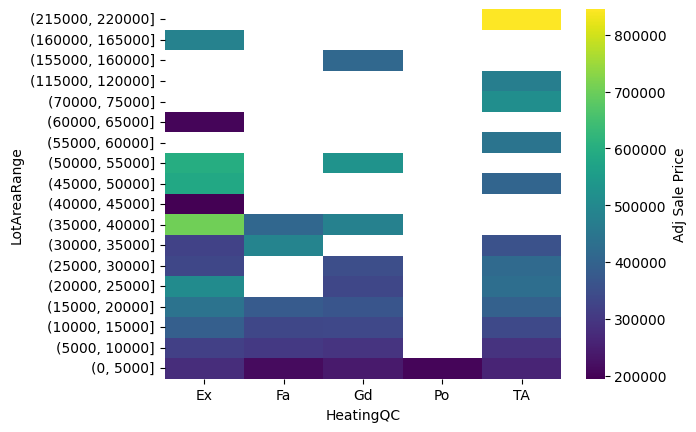

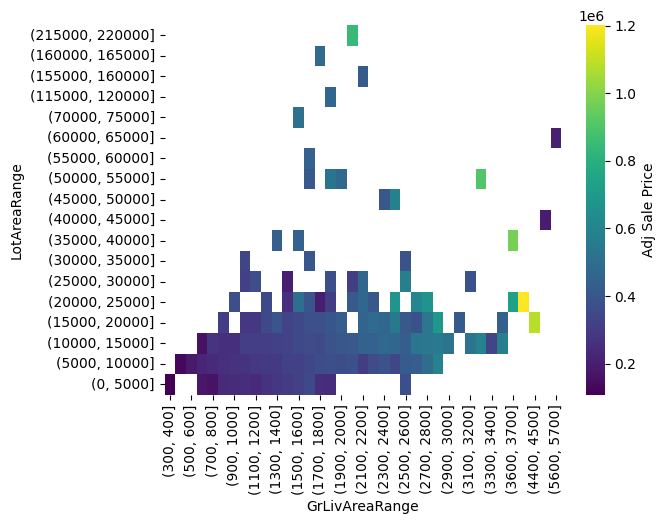

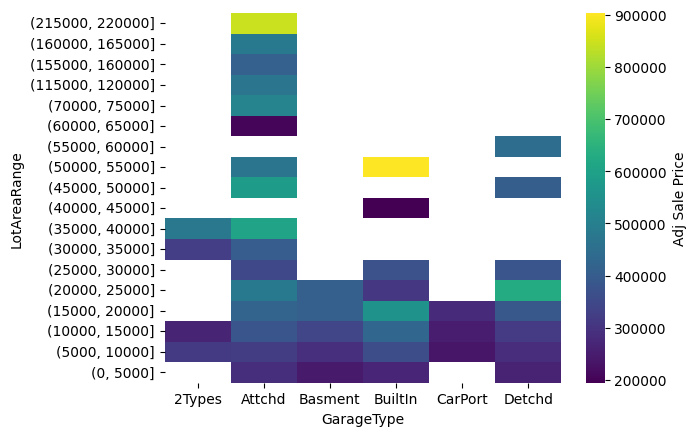

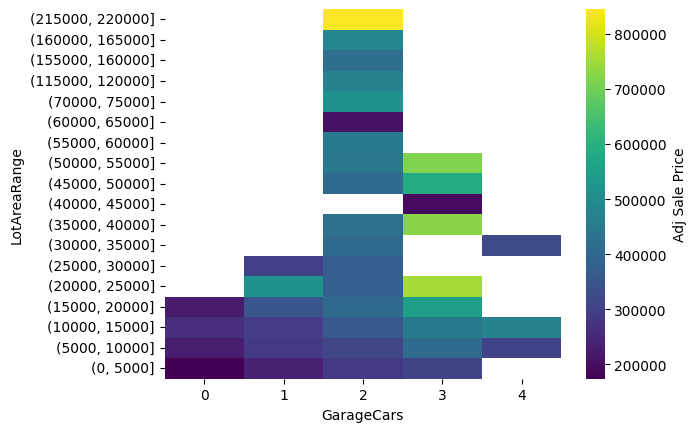

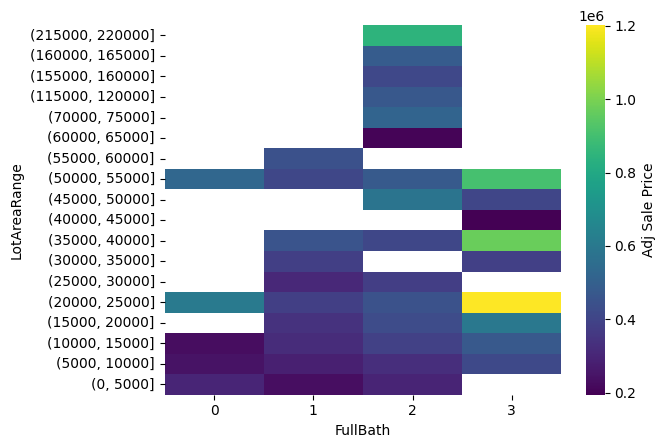

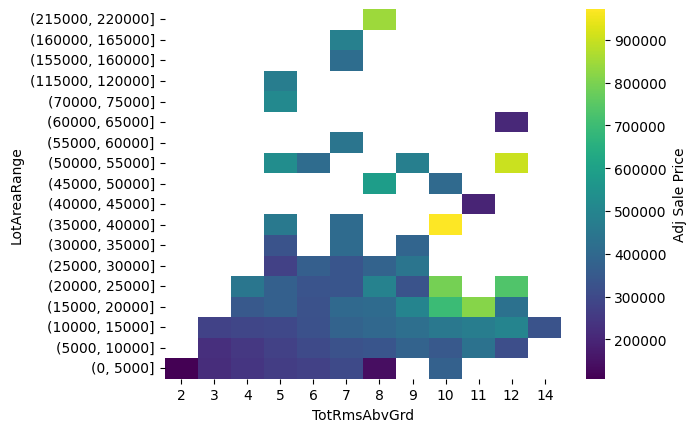

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in enumerate(range(19)):
    col1 = pairwise_combinations[i[0]][0]
    col2 = pairwise_combinations[i[0]][1]
    comps = df_adjusted.pivot_table(index=col1, columns=col2, values='AdjSalePrice')
    sns.heatmap(data=comps, cbar_kws={'label': 'Adj Sale Price'}, cmap='viridis').set(ylabel=col1, xlabel=col2)
    plt.gca().invert_yaxis()
    plt.figure()


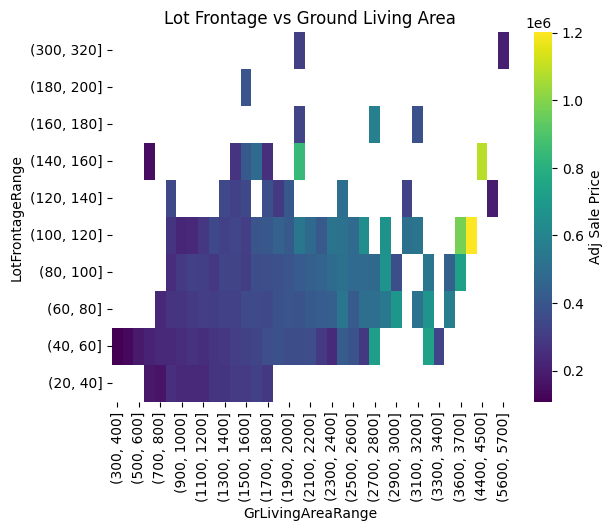

In [38]:
comps = df_adjusted.pivot_table(index='LotFrontageRange', columns='GrLivAreaRange', values='AdjSalePrice')
g = sns.heatmap(data=comps, cbar_kws={'label': 'Adj Sale Price'}, cmap='viridis').set(ylabel='LotFrontageRange', xlabel='GrLivingAreaRange')
plt.gca().invert_yaxis()
plt.title('Lot Frontage vs Ground Living Area')
plt.savefig('frontage vs ground living')

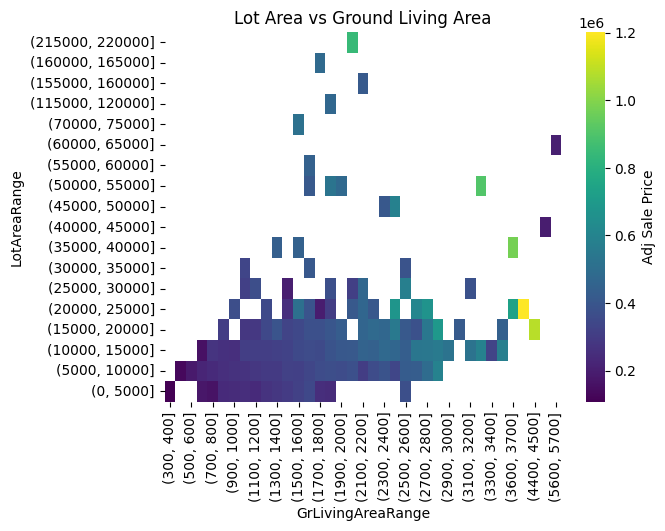

In [37]:
comps = df_adjusted.pivot_table(index='LotAreaRange', columns='GrLivAreaRange', values='AdjSalePrice')
g = sns.heatmap(data=comps, cbar_kws={'label': 'Adj Sale Price'}, cmap='viridis').set(ylabel='LotAreaRange', xlabel='GrLivingAreaRange')
plt.gca().invert_yaxis()
plt.title('Lot Area vs Ground Living Area')
plt.savefig('lot area vs ground living')

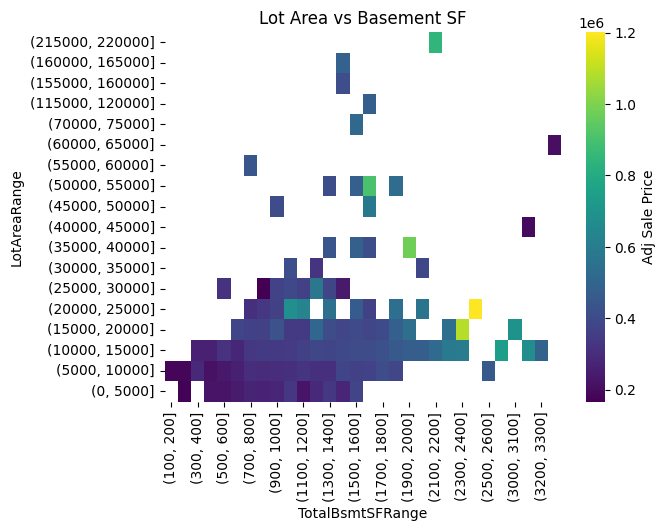

In [36]:
comps = df_adjusted.pivot_table(index='LotAreaRange', columns='TotalBsmtSFRange', values='AdjSalePrice')
g = sns.heatmap(data=comps, cbar_kws={'label': 'Adj Sale Price'}, cmap='viridis').set(ylabel='LotAreaRange', xlabel='TotalBsmtSFRange')
plt.gca().invert_yaxis()
plt.title('Lot Area vs Basement SF')
plt.savefig('lot area vs bmst sf')

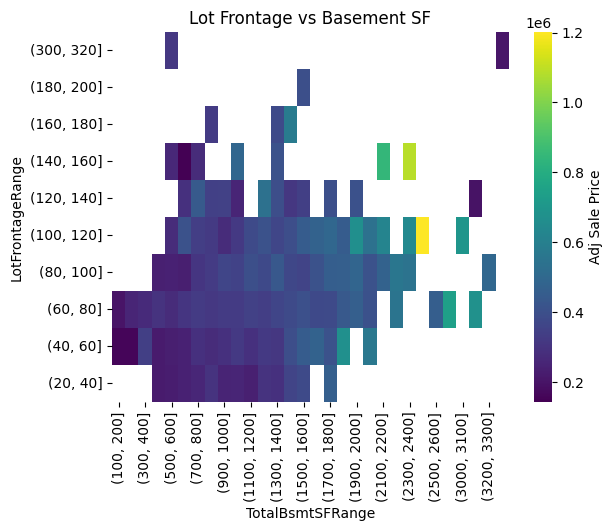

In [35]:
comps = df_adjusted.pivot_table(index='LotFrontageRange', columns='TotalBsmtSFRange', values='AdjSalePrice')
g = sns.heatmap(data=comps, cbar_kws={'label': 'Adj Sale Price'}, cmap='viridis').set(ylabel='LotFrontageRange', xlabel='TotalBsmtSFRange')
plt.gca().invert_yaxis()
plt.title('Lot Frontage vs Basement SF')
plt.savefig('lot frontage vs bmst sf')

<Figure size 500x500 with 0 Axes>

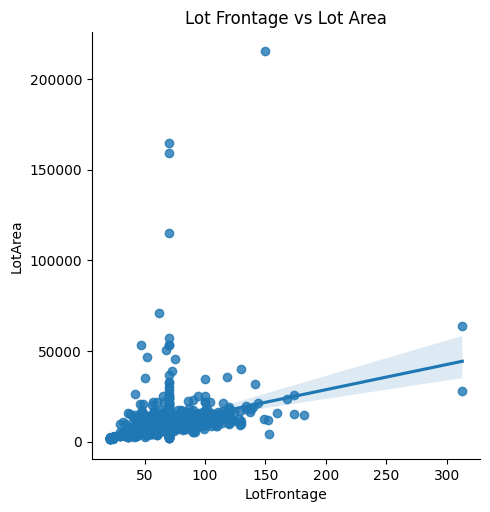

<Figure size 500x500 with 0 Axes>

In [34]:
sns.lmplot(data=df_adjusted, x = "LotFrontage",y = 'LotArea')
plt.title('Lot Frontage vs Lot Area')
plt.figure(figsize=(5,5))
#plt.savefig('lot frontage vs area lmplot.tiff')

Text(0.5, 1.0, 'Lot Frontage vs Neighborhood')

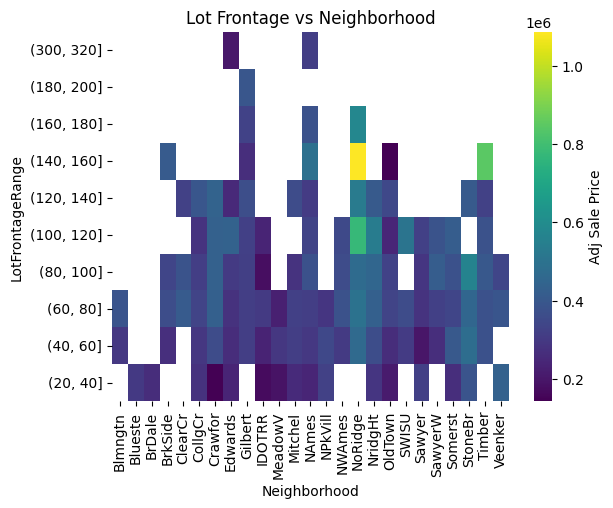

In [46]:
comps = df_adjusted.pivot_table(index='LotFrontageRange', columns='Neighborhood', values='AdjSalePrice')
g = sns.heatmap(data=comps, cbar_kws={'label': 'Adj Sale Price'}, cmap='viridis').set(ylabel='LotFrontageRange', xlabel='Neighborhood')
plt.gca().invert_yaxis()
plt.title('Lot Frontage vs Neighborhood')

Text(0.5, 1.0, 'Ground Living Space vs Neighborhood')

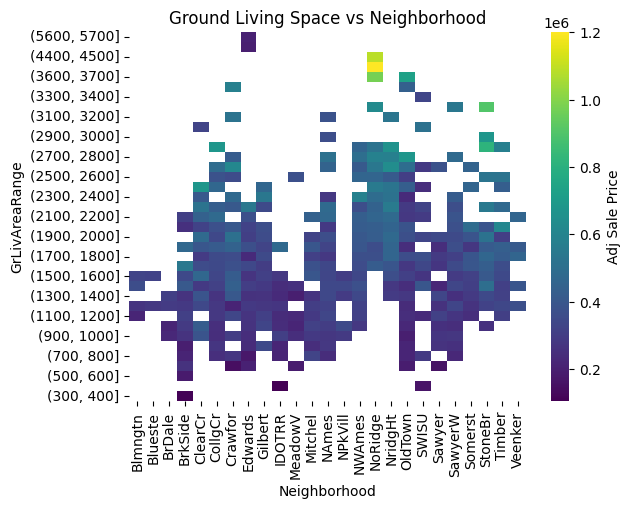

In [51]:
comps = df_adjusted.pivot_table(index='GrLivAreaRange', columns='Neighborhood', values='AdjSalePrice')
g = sns.heatmap(data=comps, cbar_kws={'label': 'Adj Sale Price'}, cmap='viridis').set(ylabel='GrLivAreaRange', xlabel='Neighborhood')
plt.gca().invert_yaxis()
plt.title('Ground Living Space vs Neighborhood')

<Figure size 640x480 with 0 Axes>

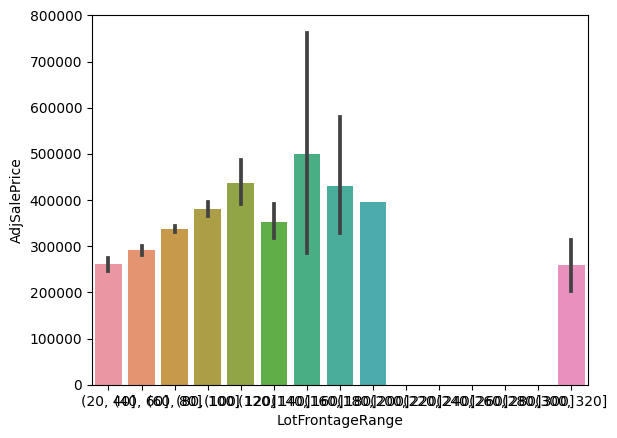

<Figure size 640x480 with 0 Axes>

In [48]:
sns.barplot(data=df_adjusted,x='LotFrontageRange',y='AdjSalePrice')
plt.figure()

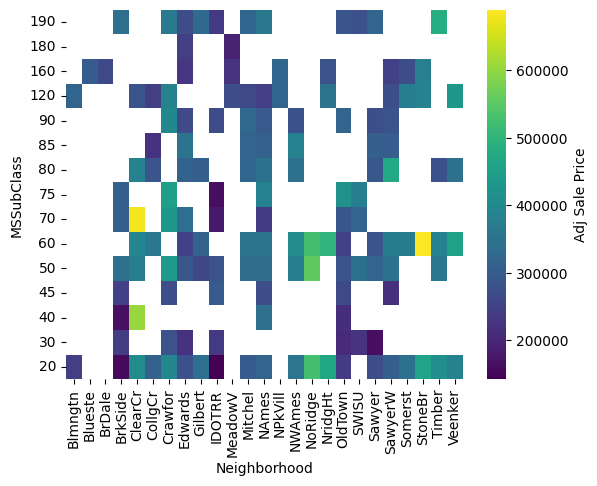

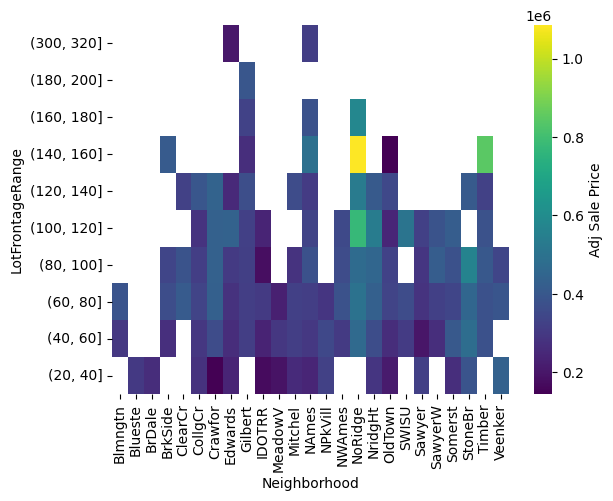

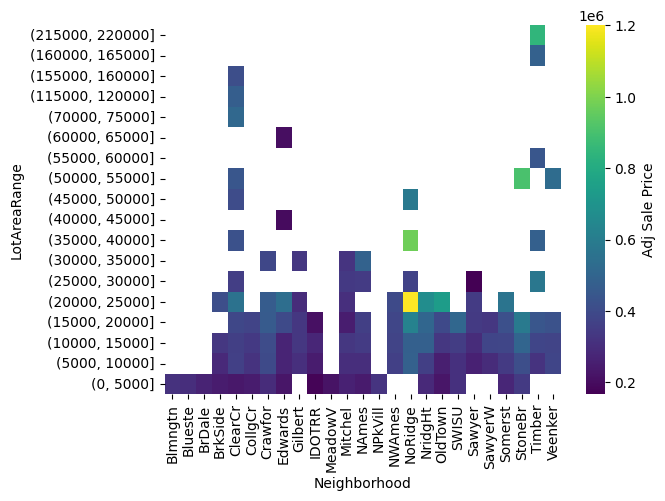

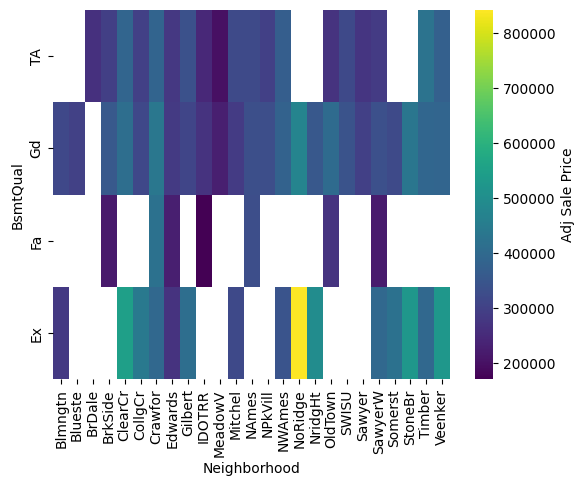

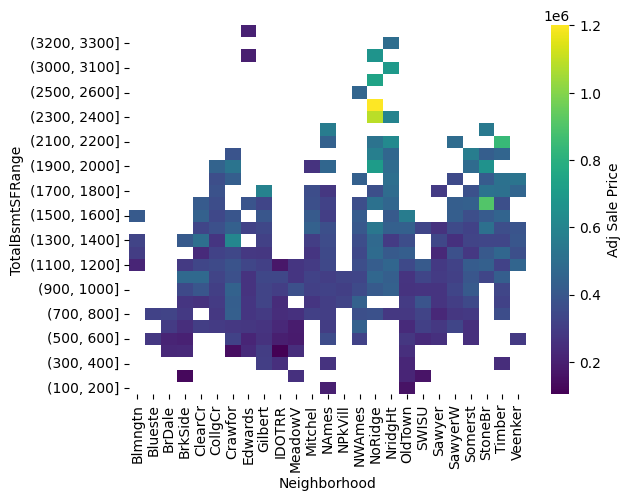

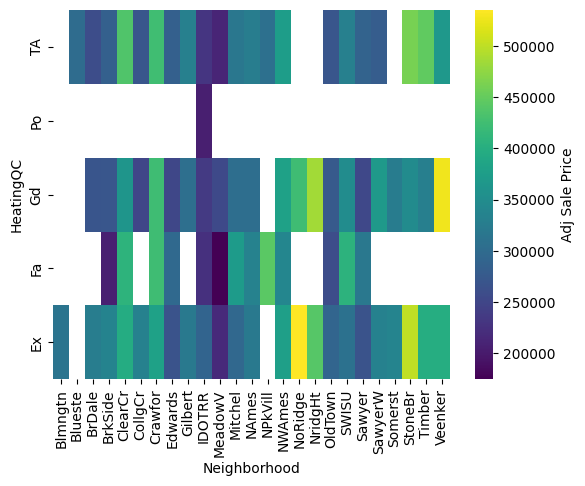

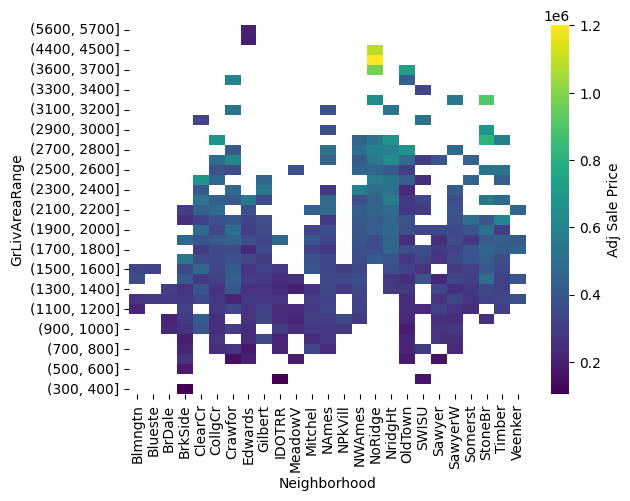

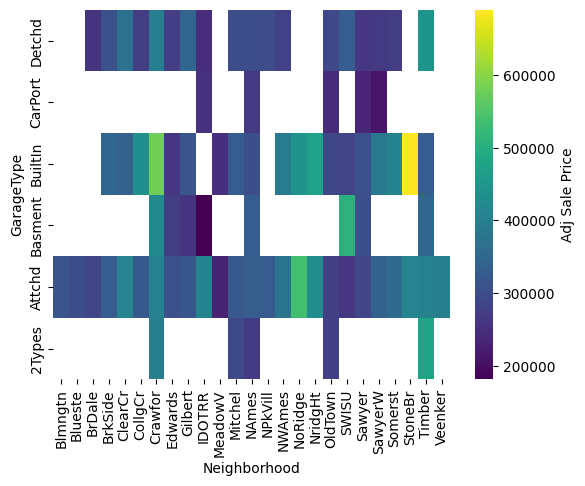

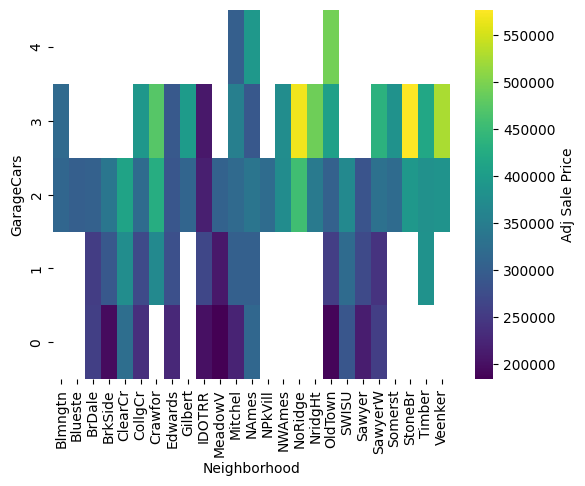

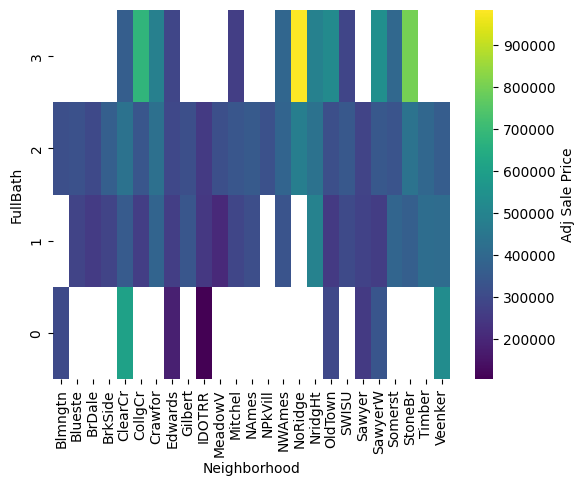

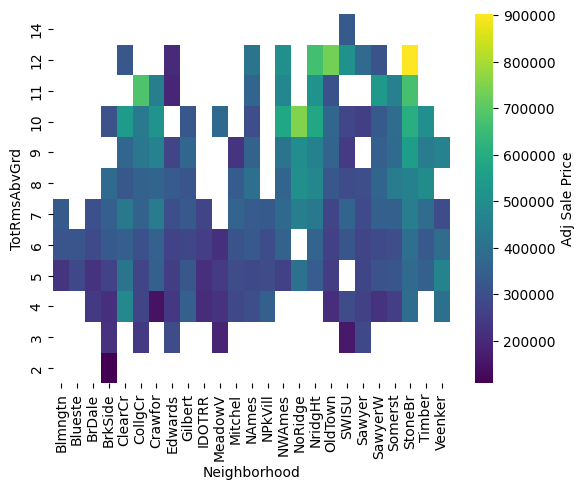

<Figure size 640x480 with 0 Axes>

In [56]:
for column in df_interest:
  comps = df_adjusted.pivot_table(index=column, columns='Neighborhood', values='AdjSalePrice')
  g = sns.heatmap(data=comps, cbar_kws={'label': 'Adj Sale Price'}, cmap='viridis').set(ylabel=column, xlabel='Neighborhood')
  plt.gca().invert_yaxis()
  plt.figure()



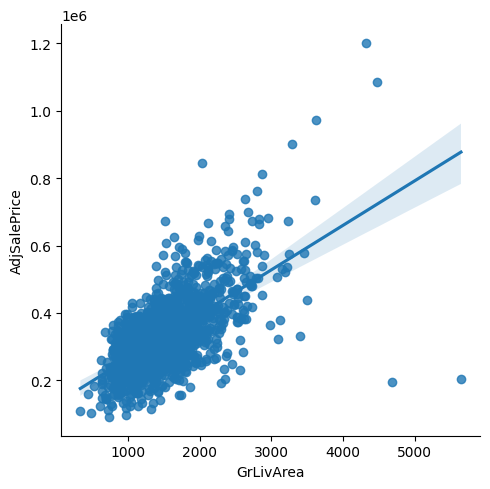

In [57]:
sns.lmplot(data=df_adjusted,x='GrLivArea',y='AdjSalePrice')